# Final Project B- Credit Worthiness

### Data Science Lifecycle:

1. Problem Definition
2. Data Cleaning
3. Exploratory Data Analysis & Data Visualization
4. Predictive Modelling

### 1. Problem Definition

Cautious plc is in the business of providing credit to individuals. They have recently compiled data on their existing customers.
1. Develop a good model for predicting defaults on payments by their customers.
2. Simplify the data system by reducing the number of variables to be studied, without sacrificing too much of accuracy.

**Objective**

Cautious plc will use the model to
a) Take credit decisions pertaining to individuals
b) As an early warning system for potential defaults

**Data**

CreditWorthiness.xlsx

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Encoding and preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Stats libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import chi2, chi2_contingency

#Dimentionality Reduction
from sklearn.decomposition import PCA

# Data Balancing
from imblearn.over_sampling import SMOTENC

#Model Evaluation 
from sklearn.metrics import ( roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score ) 
from sklearn.model_selection import train_test_split, cross_val_score

# Import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC, SVC 
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.inspection import permutation_importance

#Importing Silhoutte score to measure cluster seperability
from sklearn.metrics import silhouette_score

#To visualize decision tree
from sklearn import tree
import pydot  #conda install pydot - converts graphs into dot file
import graphviz     #conda install graphviz
import pydotplus    #conda install pydotplus

# Hyperparameter Tuning 
from sklearn.model_selection import ( GridSearchCV, RandomizedSearchCV ) 

import warnings
import os

D:\Users\Suhas\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###  Load Data

In [2]:
# Loading the dataset
os.chdir("D:\Smita\DigitalSkillsAcademy\DATA")
warnings.filterwarnings("ignore")
data = pd.read_excel("CreditWorthiness.xlsx", "Data")

In [3]:
# Checking types of variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cbal         1000 non-null   object
 1   Cdur         1000 non-null   int64 
 2   Chist        1000 non-null   object
 3   Cpur         1000 non-null   object
 4   Camt         1000 non-null   int64 
 5   Sbal         1000 non-null   object
 6   Edur         1000 non-null   object
 7   InRate       1000 non-null   int64 
 8   MSG          1000 non-null   object
 9   Oparties     1000 non-null   object
 10  Rdur         1000 non-null   object
 11  Prop         1000 non-null   object
 12  age          1000 non-null   int64 
 13  inPlans      1000 non-null   object
 14  Htype        1000 non-null   object
 15  NumCred      1000 non-null   int64 
 16  JobType      1000 non-null   object
 17  Ndepend      1000 non-null   int64 
 18  telephone    1000 non-null   object
 19  foreign      1000 non-null  

In [4]:
data.head()

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,...,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
0,0 <= Rs. < 2000,9,all settled till now,Business,13790,Rs. < 1000,1 to 4 years,2,married or widowed male,no one,...,real estate,27,bank,own,1,employee with official position,1,yes,no,good
1,0 <= Rs. < 2000,15,dues not paid earlier,electronics,15250,no savings account,more than 7 years,4,single male,"yes, guarantor",...,real estate,50,none,own,2,employee with official position,1,yes,no,good
2,0 <= Rs. < 2000,36,none taken/all settled,Business,19410,Rs. < 1000,more than 7 years,4,single male,no one,...,Unknown,61,none,free,1,"employed either in management, self or in high...",1,yes,no,bad
3,0 <= Rs. < 2000,48,none taken/all settled,Business,144090,Rs. < 1000,1 to 4 years,2,single male,no one,...,Other cars etc.,25,none,own,1,employee with official position,1,yes,no,bad
4,no checking account,24,all settled till now,electronics,31690,Rs. < 1000,less than 1 year,4,divorced or separated or married female,no one,...,life insurance/building society,26,none,own,1,employee with official position,1,yes,no,good


**Observation**

1. Dataset contains 21 columns and 1000 rows of data. Most features are of categorical type.

###  Identify Problem type

In [5]:
# Identify type of problem based on target variable
data['creditScore'].value_counts()

good    700
bad     300
Name: creditScore, dtype: int64

**Observation**

1. Since labels are given and target variable is of categorical type with two individual categories, this would be a binary classification problem from supervised machine learning.
2. Also given data is imbalanced with 70% records of 'good' category and only 30% of 'bad' category. Need to balance the data.


## Data Cleaning

In [6]:
#Keep copy of original data
dataOrg = data.copy()

In [7]:
#Checking for missing values
data.isnull().sum() 

Cbal           0
Cdur           0
Chist          0
Cpur           0
Camt           0
Sbal           0
Edur           0
InRate         0
MSG            0
Oparties       0
Rdur           0
Prop           0
age            0
inPlans        0
Htype          0
NumCred        0
JobType        0
Ndepend        0
telephone      0
foreign        0
creditScore    0
dtype: int64

In [8]:
# Understanding categorical variables
object_cols = data.select_dtypes(include=[object]).columns
object_cols

Index(['Cbal', 'Chist', 'Cpur', 'Sbal', 'Edur', 'MSG', 'Oparties', 'Rdur',
       'Prop', 'inPlans', 'Htype', 'JobType', 'telephone', 'foreign',
       'creditScore'],
      dtype='object')

In [9]:
# Check if any incorrect values in categories
for var in object_cols: 
    print("\n", var, "\n",data[var].value_counts()/np.float(len(data)))


 Cbal 
 no checking account    0.394
 Rs. < 0               0.274
0 <= Rs. < 2000        0.269
Rs. >=2000             0.063
Name: Cbal, dtype: float64

 Chist 
 all settled till now      0.618
dues not paid earlier     0.293
all settled               0.049
none taken/all settled    0.040
Name: Chist, dtype: float64

 Cpur 
 electronics            0.280
second hand vehicle    0.234
furniture              0.181
new vehicle            0.103
Business               0.097
education              0.050
renovation             0.022
miscellaneous          0.012
domestic needs         0.012
retaining              0.009
Name: Cpur, dtype: float64

 Sbal 
 Rs. < 1000              0.603
no savings account      0.183
1000 <= Rs. < 5,000     0.103
5000 <= Rs. < 10,000    0.063
Rs. >= 10,000           0.048
Name: Sbal, dtype: float64

 Edur 
 1 to 4 years         0.339
more than 7 years    0.253
4 to 7 years         0.174
less than 1 year     0.172
not employed         0.062
Name: Edur, dtype: float64

In [10]:
# Checking duplicates if any in the given data
data.duplicated().sum()      #[Observation:No duplicates] 

0

**Observation:**
1. We see that data does Not contain missing values, nor does it contain duplicate records.
2. Also categories do not have any missing names

In [11]:
# Check unique values in each categorical variable
for col in object_cols:
    print(f"Column '{col}' = {data[col].unique()}\n")

Column 'Cbal' = ['0 <= Rs. < 2000' 'no checking account' ' Rs. < 0' 'Rs. >=2000']

Column 'Chist' = ['all settled till now' 'dues not paid earlier' 'none taken/all settled'
 'all settled']

Column 'Cpur' = ['Business' 'electronics' 'renovation' 'second hand vehicle' 'education'
 'new vehicle' 'miscellaneous' 'furniture' 'retaining' 'domestic needs']

Column 'Sbal' = ['Rs. < 1000' 'no savings account' 'Rs. >= 10,000' '5000 <= Rs. < 10,000'
 '1000 <= Rs. < 5,000']

Column 'Edur' = ['1 to 4 years' 'more than 7 years' 'less than 1 year' '4 to 7 years'
 'not employed']

Column 'MSG' = ['married or widowed male' 'single male'
 'divorced or separated or married female' 'divorced or separated male']

Column 'Oparties' = ['no one' 'yes, guarantor' 'yes, co-applicant']

Column 'Rdur' = ['less than a year' 'more than 3 years' '1 to 2 years' '2 to 3 years']

Column 'Prop' = ['real estate' 'Unknown' 'Other cars etc.'
 'life insurance/building society']

Column 'inPlans' = ['bank' 'none' 'stores']



In [12]:
# Understand numerical features
num_cols = data.select_dtypes(exclude='O').columns
data[num_cols].head()

,Cdur,Camt,InRate,age,NumCred,Ndepend
0,9,13790,2,27,1,1
1,15,15250,4,50,2,1
2,36,19410,4,61,1,1
3,48,144090,2,25,1,1
4,24,31690,4,26,1,1


**Based on domain knowledge, build Assumptions about target (CreditScore), to validate later:**

Higher could be the probability of 'good' creditScore if:
1. Cbal: Higher balance in checking account, higher the probability of 'good' creditSccore
2. Cdur: Lower duration of credit
3. Chist: More regularity in settlement history
4. Camt : Lower the amount
5. Sbal : Higher balance in account
6. Edur : Higher the employment period
7. MSG: Married people could be 'good' creditScore bearer
8. Oparties: Having guranteer could be indicator of 'good' creditScorer
9. Age : Higher the age, higher could be probability of 'good' creditScorer
10. InPlans: If no other loans, higher probability of  'good' creditScorer
11. Htype : Owning a house could indicate higher probability of  'good' creditScorer
12. NumCred, Ndepend : Lesser the better
13. Foreign: Foreign workers may have lesser probability of defaulting loan

## Exploratory data analysis & Data Visualization:

#### Numerical Variables

In [13]:
# Summary / Descriptive Statistics of Numerical variables
data.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                 .background_gradient(subset=['std'], cmap='icefire')\
                 .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Cdur,1000.000000,20.903000,12.058814,4.000000,12.000000,18.000000,24.000000,72.000000
Camt,1000.000000,32592.580000,28227.368760,2380.000000,13535.000000,23075.000000,39602.500000,184120.000000
InRate,1000.000000,2.973000,1.118715,1.000000,2.000000,3.000000,4.000000,4.000000
age,1000.000000,35.546000,11.375469,19.000000,27.000000,33.000000,42.000000,75.000000
NumCred,1000.000000,1.407000,0.577654,1.000000,1.000000,1.000000,2.000000,4.000000
Ndepend,1000.000000,1.155000,0.362086,1.000000,1.000000,1.000000,1.000000,2.000000


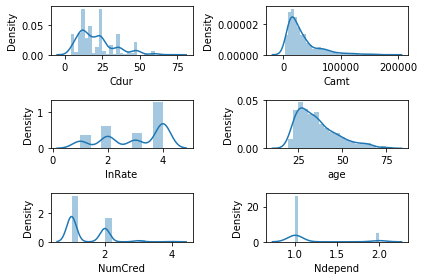

In [14]:
# Plot histograms of numeric features to visualize distribution
for i, column in enumerate(num_cols, 1):
    plt.subplot(3,2,i)
    sns.distplot(data[column])
    plt.tight_layout()


In [15]:
# Some numeric variables seem to possess discrete values, let's check those.
for col in ['NumCred','InRate','Cdur','Ndepend']:
    print(f"Column '{col}' = {data[col].unique()}\n")

Column 'NumCred' = [1 2 4 3]

Column 'InRate' = [2 4 1 3]

Column 'Cdur' = [ 9 15 36 48 24 27 12  7  8 42 11 54 30 18 10 20  6 14 33 21 60 16 45  4
 47 13 22 39 28  5 26 72 40]

Column 'Ndepend' = [1 2]



In [16]:
# Check correlation among numerical columns
data[num_cols].corr()

,Cdur,Camt,InRate,age,NumCred,Ndepend
Cdur,1.000000,0.624984,0.074749,-0.036136,-0.011284,-0.023834
Camt,0.624984,1.000000,-0.271316,0.032716,0.020795,0.017142
InRate,0.074749,-0.271316,1.000000,0.058266,0.021669,-0.071207
age,-0.036136,0.032716,0.058266,1.000000,0.149254,0.118201
NumCred,-0.011284,0.020795,0.021669,0.149254,1.000000,0.109667
Ndepend,-0.023834,0.017142,-0.071207,0.118201,0.109667,1.000000


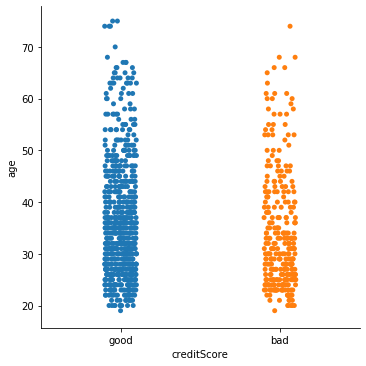

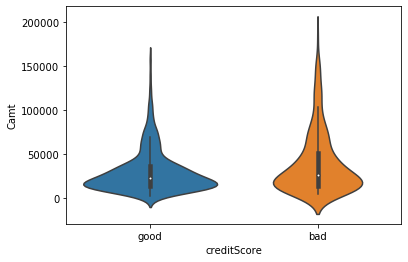

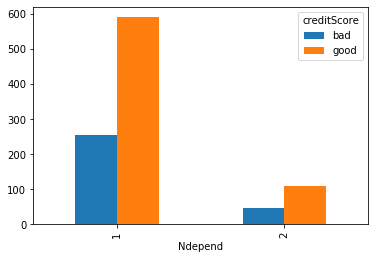

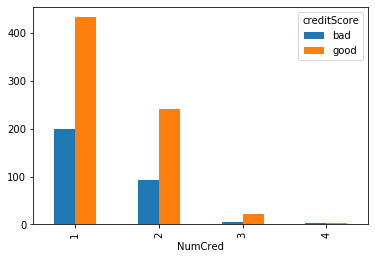

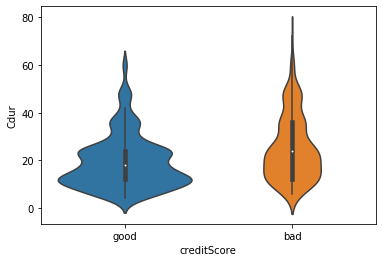

In [17]:
# Visualize relationship between numeric features and target
sns.catplot( x='creditScore',y='age', data=data)
plt.show()
sns.violinplot( x='creditScore',y='Camt',  data=data, kind='count')
plt.show()
pd.crosstab(data['Ndepend'], data['creditScore']).plot(kind='bar')
plt.show()
pd.crosstab(data['NumCred'], data['creditScore'] ).plot(kind='bar')
plt.show()
sns.violinplot( x='creditScore',y='Cdur', data=data, scale='count')
plt.show()

In [18]:
# Check average values of numerical features for good/bad creditscores
for col in num_cols:
    print("\n",col," \n",data.groupby(data['creditScore'])[col].mean())


 Cdur  
 creditScore
bad     24.860000
good    19.207143
Name: Cdur, dtype: float64

 Camt  
 creditScore
bad     39261.266667
good    29734.571429
Name: Camt, dtype: float64

 InRate  
 creditScore
bad     3.096667
good    2.920000
Name: InRate, dtype: float64

 age  
 creditScore
bad     33.963333
good    36.224286
Name: age, dtype: float64

 NumCred  
 creditScore
bad     1.366667
good    1.424286
Name: NumCred, dtype: float64

 Ndepend  
 creditScore
bad     1.153333
good    1.155714
Name: Ndepend, dtype: float64


In [19]:
# Check mode values of discrete features for good/bad creditscores
for col in ['Cdur','Ndepend','NumCred', 'InRate']:
    print("\n",col," \n",data.groupby(data['creditScore'])[col].agg(pd.Series.mode))


 Cdur  
 creditScore
bad     24
good    12
Name: Cdur, dtype: int64

 Ndepend  
 creditScore
bad     1
good    1
Name: Ndepend, dtype: int64

 NumCred  
 creditScore
bad     1
good    1
Name: NumCred, dtype: int64

 InRate  
 creditScore
bad     4
good    4
Name: InRate, dtype: int64


**Observations:**
1. NumCred, InRate, Ndepend are discrete features
2. Age and Camt are continuous features, right skewed 
3. Cdur has too many discrete values, may need enrichment 
4. Cdur and Camt show strong positive relationship
5. Bad credit Scorers are mainly in the age group 20-40
6. Good Credit Scorers have lesser dependents (1)
7. Good credit Scorers also have lesser no. of existing credits
8. Camt - smaller credit amount, higher probability of good scorer
9. Cdur - Credit duration is lesser for good credits

#### Check for Outliers

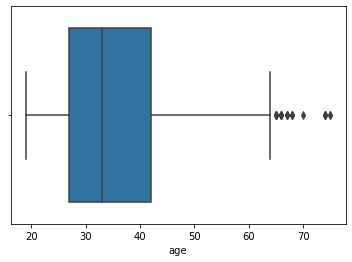

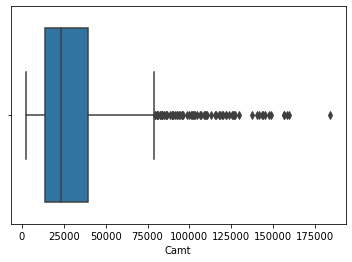

In [20]:
# Checking Outliers
sns.boxplot(data['age'])
plt.show()

sns.boxplot(data['Camt'])
plt.show()

In [21]:
#Treat Outliers

data_wo = data.copy()
#Outliers treatment for 'age'
q1, q2, q3 = data_wo['age'].quantile([0.25,0.5,0.75])
IQR = q3 - q1
lower_cap=q1-1.5*IQR
upper_cap=q3+1.5*IQR
data_wo['age']=data_wo['age'].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

# Treat outliers in Camt
q1, q2, q3 = data_wo['Camt'].quantile([0.25,0.5,0.75])
IQR = q3 - q1
lower_cap=q1-1.5*IQR
upper_cap=q3+1.5*IQR
data_wo['Camt']=data_wo['Camt'].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

#data = data_wo.copy()

**Observation:**
Models gave little lesser accuracy with outliers treated data hence we will retain outliers as is

In [22]:
# Pairplot to visualize relationship
#sns.pairplot(data[num_cols])
#plt.show()

#### EDA - Categorical Variables

In [23]:
# Visualize Summary of categorical variables
data.describe(include = 'O').T.style.bar(subset=['unique'])\
                                    .background_gradient(subset=['freq'])

,count,unique,top,freq
Cbal,1000,4,no checking account,394
Chist,1000,4,all settled till now,618
Cpur,1000,10,electronics,280
Sbal,1000,5,Rs. < 1000,603
Edur,1000,5,1 to 4 years,339
MSG,1000,4,single male,548
Oparties,1000,3,no one,907
Rdur,1000,4,more than 3 years,413
Prop,1000,4,Other cars etc.,332
inPlans,1000,3,none,814


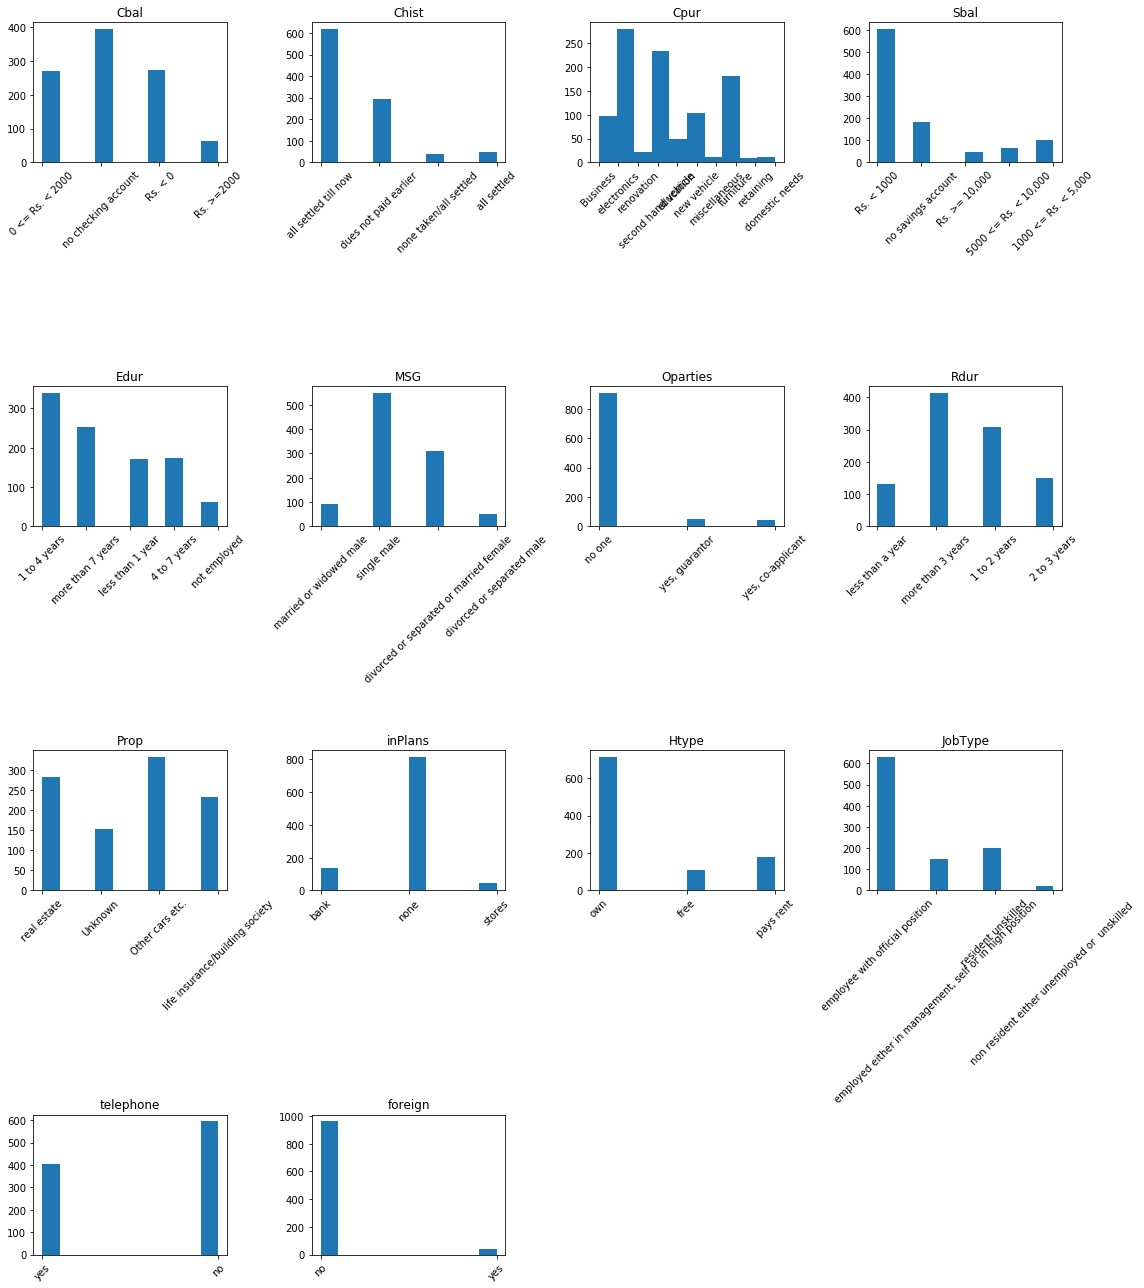

In [24]:
# Plot histogram of categorical variables to visualize categories
cat_cols = list(object_cols)
cat_cols.remove('creditScore')

plt.figure(figsize=(16, 18))
for i, column in enumerate(cat_cols, 1):
    plt.subplot(4,4,i)
    plt.hist(data[column])
    plt.xticks(rotation=45)
    plt.title(column)
    plt.tight_layout()

**Observation:**
1. Dataset is imbalanced with target (creditScore) feature having 700 good and only 300 bad categories
2. Few categorical variables (foreign, inPlans, Oparties, Htype) have dominating single category, hence may not contribute much in target classification. Let's study those in depth.

In [25]:
# Print % of categories in these 4 features
for col in ['foreign', 'inPlans', 'Oparties', 'Htype']:
    print("\n", pd.crosstab(data[col], data['creditScore'], normalize=True, margins=True))


 creditScore    bad   good    All
foreign                         
no           0.296  0.667  0.963
yes          0.004  0.033  0.037
All          0.300  0.700  1.000

 creditScore    bad   good    All
inPlans                         
bank         0.057  0.082  0.139
none         0.224  0.590  0.814
stores       0.019  0.028  0.047
All          0.300  0.700  1.000

 creditScore          bad   good    All
Oparties                              
no one             0.272  0.635  0.907
yes, co-applicant  0.018  0.023  0.041
yes, guarantor     0.010  0.042  0.052
All                0.300  0.700  1.000

 creditScore    bad   good    All
Htype                           
free         0.044  0.064  0.108
own          0.186  0.527  0.713
pays rent    0.070  0.109  0.179
All          0.300  0.700  1.000


**Observation:**
1. Crosstab shows that one single category dominates the feature with more than 70% of values, we can consider dropping them with more analysis during feature selection process.

###  Visualize impact of categories on target

<Figure size 1080x1296 with 0 Axes>

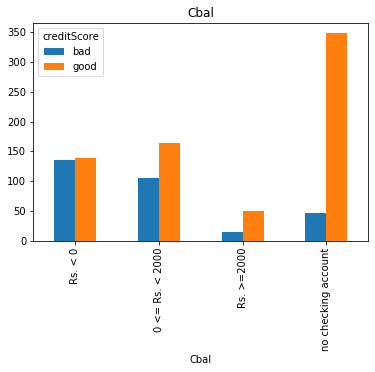

<Figure size 1080x1296 with 0 Axes>

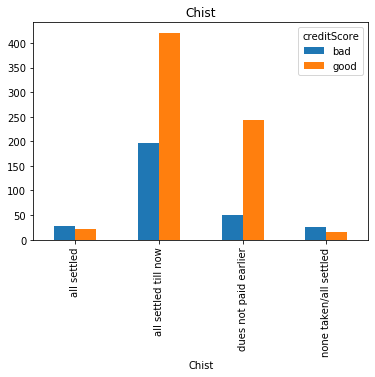

<Figure size 1080x1296 with 0 Axes>

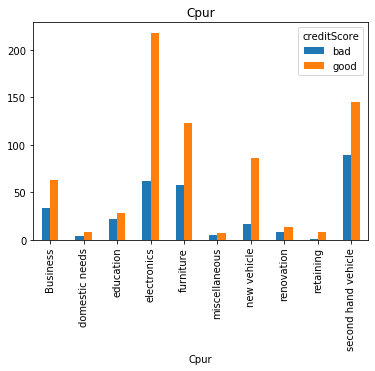

<Figure size 1080x1296 with 0 Axes>

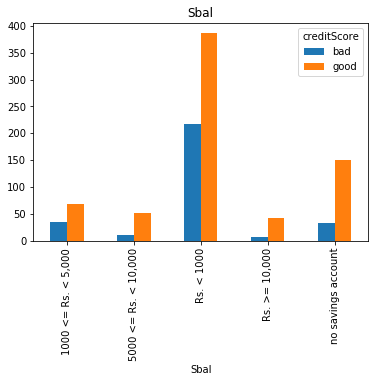

<Figure size 1080x1296 with 0 Axes>

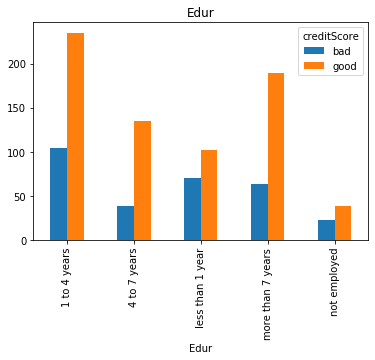

<Figure size 1080x1296 with 0 Axes>

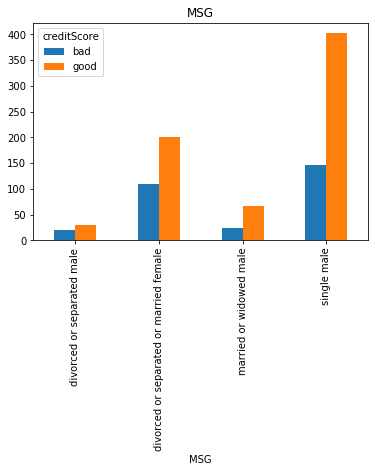

<Figure size 1080x1296 with 0 Axes>

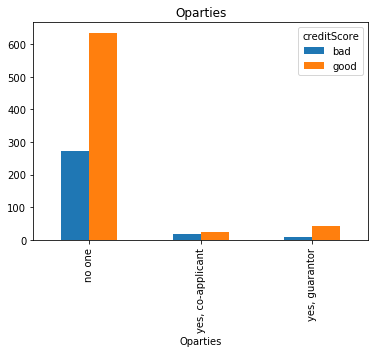

<Figure size 1080x1296 with 0 Axes>

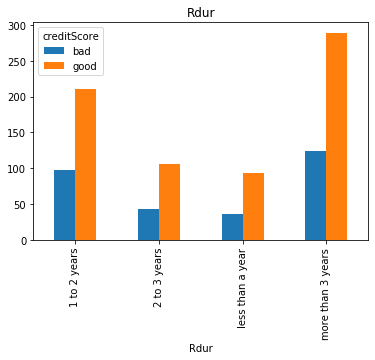

<Figure size 1080x1296 with 0 Axes>

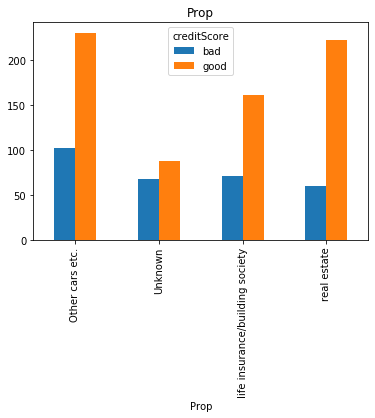

<Figure size 1080x1296 with 0 Axes>

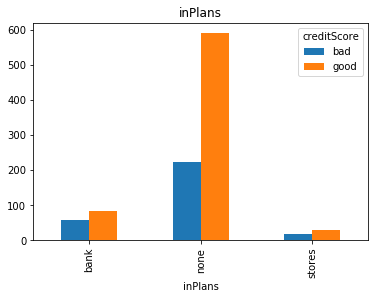

<Figure size 1080x1296 with 0 Axes>

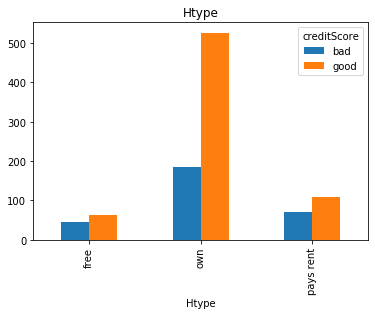

<Figure size 1080x1296 with 0 Axes>

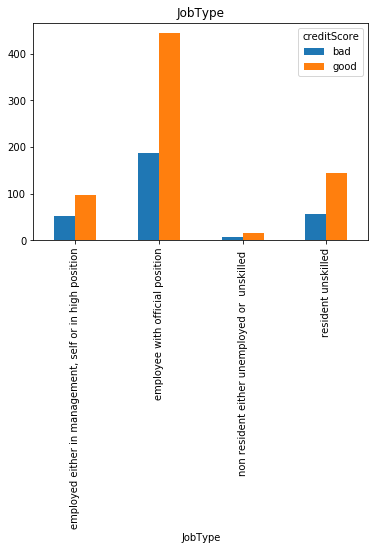

<Figure size 1080x1296 with 0 Axes>

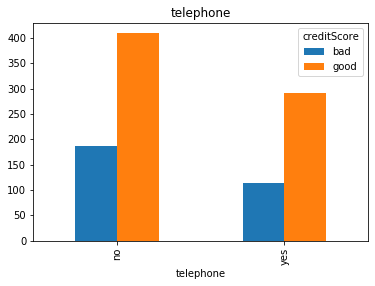

<Figure size 1080x1296 with 0 Axes>

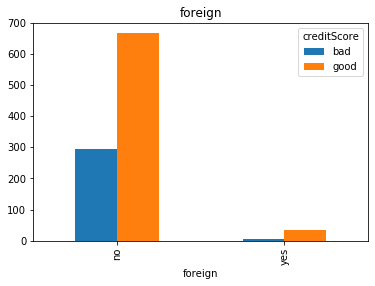

In [26]:
# Visualize impact of categories on target
for feature in cat_cols:
    plt.figure(figsize=(15,18))
    pd.crosstab(data[feature],data['creditScore']).plot(kind='bar')
    plt.title(feature)
    plt.show()

**Observation:**
1. For all features, all categories show majority values for 'good' creditScore compared to 'bad' creditScore. This may not not give right picture in identifying feature's impact on target. Since data is imbalanced for 'good' creditScore, we are probably not getting the right picture. Let's balance the data first and visualize again.

In [27]:
# Since Cdur and Camt have positive correlation, lets try creating a new feature using these two 
#data = dataOrg.copy()
#data['amtPdur'] = data['Camt']/data['Cdur']
#data = data.drop(columns=['Camt', 'Cdur'])
#np.log(data['amtPdur']).hist()
#data['amtPdur'] = np.log(data['amtPdur'])
#data['amtPdur']

# Try log transformation of skewed features
#data['age'] = np.log(data['age'])
#data['Camt'] = np.log(data['Camt'])

###  Balance the given dataset

In [28]:
# Identify X & y features before balancing
X=data.drop(columns=['creditScore'])
y = data['creditScore']

In [29]:
X.columns

Index(['Cbal', 'Cdur', 'Chist', 'Cpur', 'Camt', 'Sbal', 'Edur', 'InRate',
       'MSG', 'Oparties', 'Rdur', 'Prop', 'age', 'inPlans', 'Htype', 'NumCred',
       'JobType', 'Ndepend', 'telephone', 'foreign'],
      dtype='object')

In [30]:
# Balance the dataset using oversampling SMOTENC technique
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0,2,3,5,6,8,9,10,11,13,14,16,18,19], random_state=0, k_neighbors=13)
#smote_nc = SMOTENC(categorical_features=[0,1,2,3,5,6,7,8,9,10,13,15], random_state=0, k_neighbors=13)
x_resampled, y_resampled = smote_nc.fit_resample(X, y)
bal_data = x_resampled
bal_data['creditScore']=y_resampled
bal_data['creditScore'].value_counts()

bad     700
good    700
Name: creditScore, dtype: int64

**Observation:**
1. SMOTENC performed oversampling using Kneighbours algorithm
2. It added 400 records of 'bad' creditScore category to dataset. Now dataset is balanced with creditScore of 700 good and 700 bad values 

<Figure size 1080x1296 with 0 Axes>

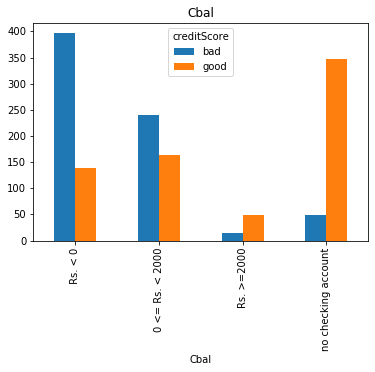

<Figure size 1080x1296 with 0 Axes>

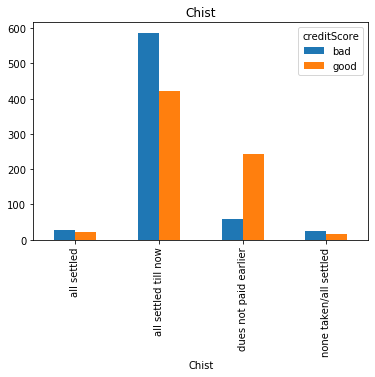

<Figure size 1080x1296 with 0 Axes>

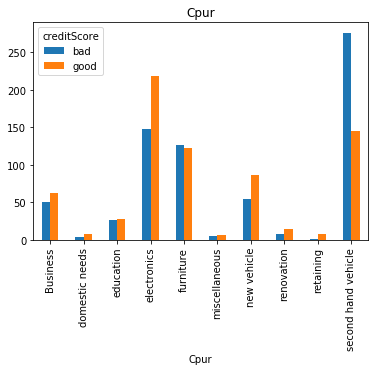

<Figure size 1080x1296 with 0 Axes>

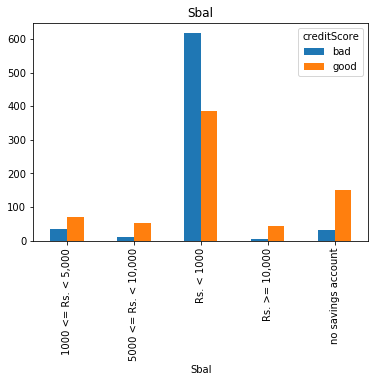

<Figure size 1080x1296 with 0 Axes>

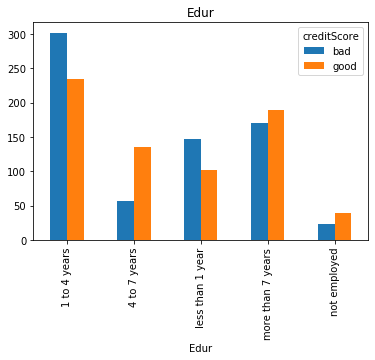

<Figure size 1080x1296 with 0 Axes>

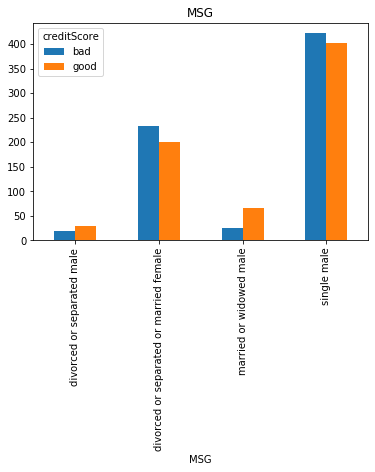

<Figure size 1080x1296 with 0 Axes>

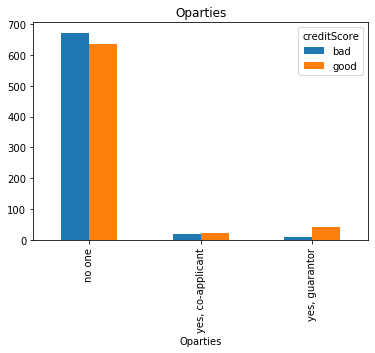

<Figure size 1080x1296 with 0 Axes>

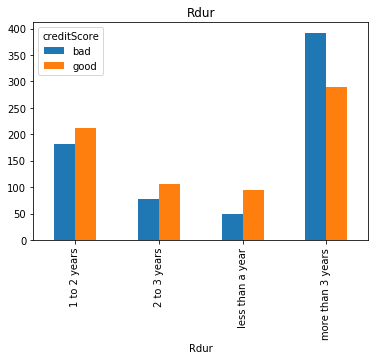

<Figure size 1080x1296 with 0 Axes>

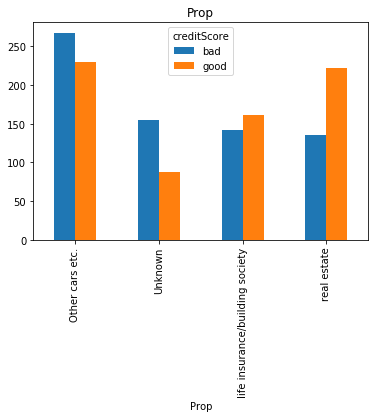

<Figure size 1080x1296 with 0 Axes>

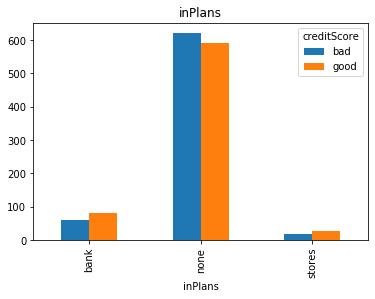

<Figure size 1080x1296 with 0 Axes>

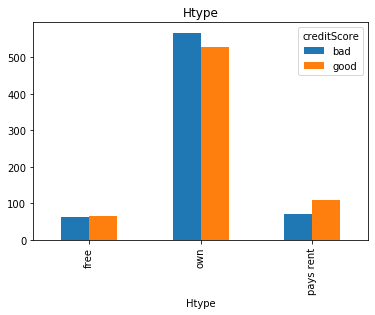

<Figure size 1080x1296 with 0 Axes>

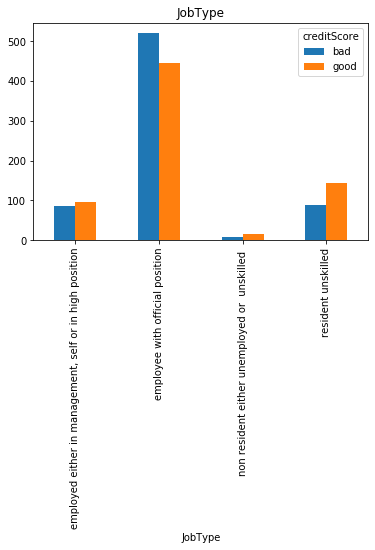

<Figure size 1080x1296 with 0 Axes>

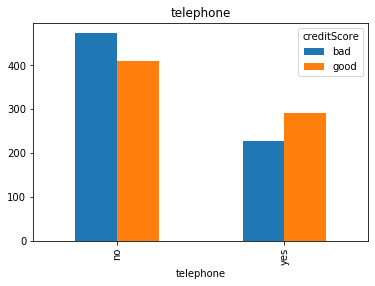

<Figure size 1080x1296 with 0 Axes>

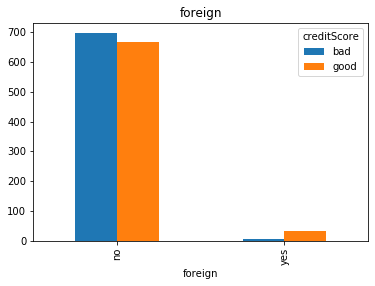

In [31]:
# Visualize impact of categories on balanced dataset
for feature in cat_cols:
    plt.figure(figsize=(15,18))
    pd.crosstab(bal_data[feature],bal_data['creditScore']).plot(kind='bar')
    plt.title(feature)
    plt.show()

**Observation:**
1. For many features, categories can be cleaned by clubbing multiple categories together. e.g. 'all settled', 'all settled till now' can be combined into single category 'settled'. Let's do that first so that impact on target is clearly visible.

In [32]:
data1 = bal_data.copy()
data1['Cbal'] = data1['Cbal'].map({'0 <= Rs. < 2000':'LT2K', 'no checking account':'NOACC', ' Rs. < 0':'LT2K', 'Rs. >=2000':'GT2K'})
data1['Chist'] = data1['Chist'].map({'all settled till now':'Settled', 'dues not paid earlier':'NotPaid', 'none taken/all settled':'Settled',
 'all settled':'Settled'})
data1['Cpur'] = data1['Cpur'].map({'Business':'Business', 'electronics':'Domestic', 'renovation':'Domestic', 'second hand vehicle':'vehicle', 'education':'Business',
 'new vehicle':'vehicle', 'miscellaneous':'Business', 'furniture':'Domestic', 'retaining':'Business', 'domestic needs':'Domestic'})
data1['Sbal'] = data1['Sbal'].map({'Rs. < 1000':'LT1K', 'no savings account':'NOACC', 'Rs. >= 10,000':'GT1K', '5000 <= Rs. < 10,000':'GT1K',
 '1000 <= Rs. < 5,000':'GT1K'})
data1['Edur'] = data1['Edur'].map({'1 to 4 years':'LT4', 'more than 7 years':'GT4', 'less than 1 year':'LT4', '4 to 7 years':'GT4', 'not employed':'NOEMP'})
data1['MSG'] = data1['MSG'].map({'married or widowed male':'Male', 'single male':'Male',
 'divorced or separated or married female':'Female', 'divorced or separated male':'Male'})
data1['Oparties'] = data1['Oparties'].map({'no one':'No', 'yes, guarantor':'Yes', 'yes, co-applicant':'Yes'})
data1['Rdur'] = data1['Rdur'].map({'less than a year':'LT3', 'more than 3 years':'GT3', '1 to 2 years':'LT3', '2 to 3 years':'LT3'})
data1['Prop'] = data1['Prop'].map({'real estate':'RealEstate', 'Unknown':'Unknown', 'Other cars etc.':'Car-Insurance',
 'life insurance/building society':'Car-Insurance'})
data1['JobType'] = data1['JobType'].map({'employee with official position':'skilled',
 'employed either in management, self or in high position':'skilled',
 'resident unskilled':'Unskilled', 'non resident either unemployed or  unskilled ':'Unskilled'})

# let's bin the numerical features too
data1['age'] = data1['age'].apply(lambda x: 'LT40' if x<=40 else 'GT40')
data1['Camt'] = data1['Camt'].apply(lambda x: 'LT30K' if x<=30000 else 'GT30K')
data1['Cdur'] = data1['Cdur'].apply(lambda x: 'LT20' if x<=20 else 'GT20')
#bal_clean_data = data1.copy()


In [33]:
data1.head()

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,...,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
0,LT2K,LT20,Settled,Business,LT30K,LT1K,LT4,2,Male,No,...,RealEstate,LT40,bank,own,1,skilled,1,yes,no,good
1,LT2K,LT20,NotPaid,Domestic,LT30K,NOACC,GT4,4,Male,Yes,...,RealEstate,GT40,none,own,2,skilled,1,yes,no,good
2,LT2K,GT20,Settled,Business,LT30K,LT1K,GT4,4,Male,No,...,Unknown,GT40,none,free,1,skilled,1,yes,no,bad
3,LT2K,GT20,Settled,Business,GT30K,LT1K,LT4,2,Male,No,...,Car-Insurance,LT40,none,own,1,skilled,1,yes,no,bad
4,NOACC,GT20,Settled,Domestic,GT30K,LT1K,LT4,4,Female,No,...,Car-Insurance,LT40,none,own,1,skilled,1,yes,no,good


<Figure size 1080x1296 with 0 Axes>

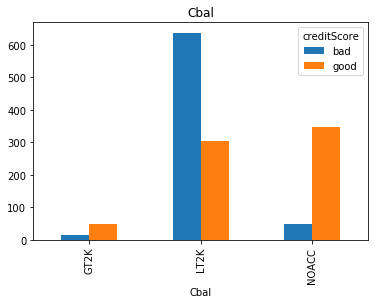

<Figure size 1080x1296 with 0 Axes>

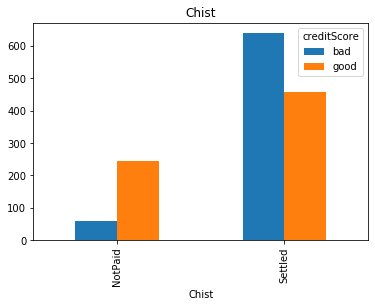

<Figure size 1080x1296 with 0 Axes>

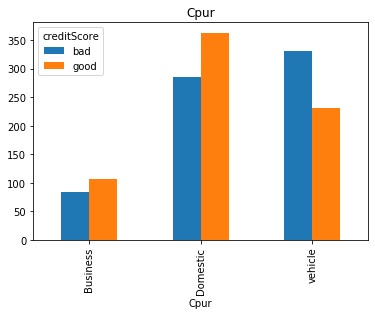

<Figure size 1080x1296 with 0 Axes>

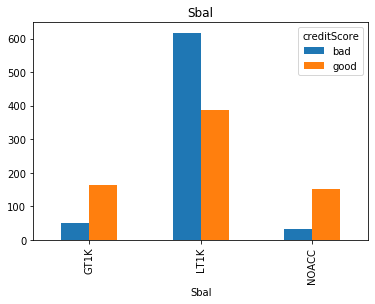

<Figure size 1080x1296 with 0 Axes>

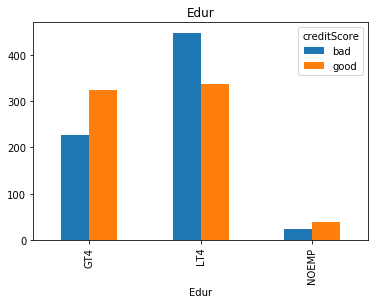

<Figure size 1080x1296 with 0 Axes>

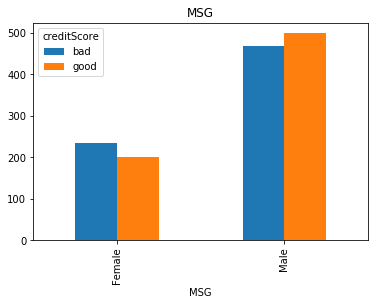

<Figure size 1080x1296 with 0 Axes>

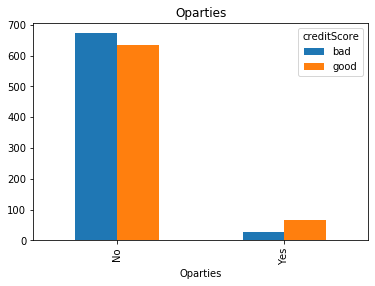

<Figure size 1080x1296 with 0 Axes>

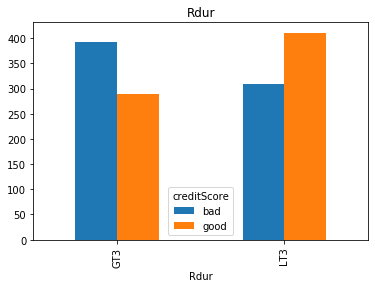

<Figure size 1080x1296 with 0 Axes>

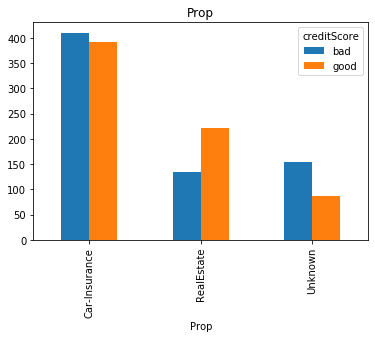

<Figure size 1080x1296 with 0 Axes>

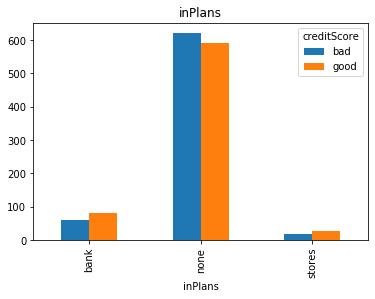

<Figure size 1080x1296 with 0 Axes>

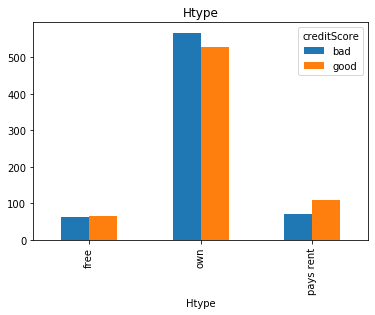

<Figure size 1080x1296 with 0 Axes>

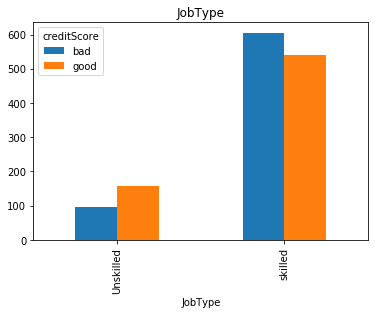

<Figure size 1080x1296 with 0 Axes>

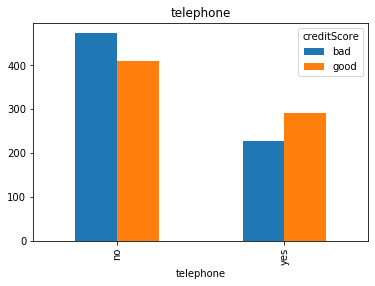

<Figure size 1080x1296 with 0 Axes>

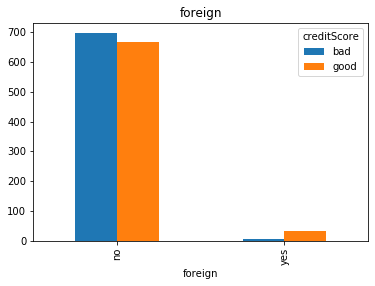

In [34]:
# Visualize impact of categories with balanced dataset
for feature in cat_cols:
    plt.figure(figsize=(15,18))
    pd.crosstab(data1[feature],data1['creditScore']).plot(kind='bar')
    plt.title(feature)
    plt.show()

**EDA Summary:**
Good scores have:
1. Cbal: Higher balance in checking account, higher the probability of 'good' creditSccore
2. Cdur: Lower duration of credit
3. Camt : Smaller credit amount    
4. NumCred, Ndepend : Lesser no. of existing credits, lesser dependents  
5. Sbal : Higher balance (>1000) in account or No account
6. Edur : Higher (>4 years) the employment period
7. MSG: Male candidates are better credit scoers than females
8. Oparties: Having guranteer indicates'good' creditScorer
9. Age : Higher age people(>50) good credit scorers
10. Htype : People who live for free or pay rent have good credit score

# Model Building

In [35]:
#Function to check Multi-collinearity among variables
def vif_scores(data):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = data.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return VIF_Scores

# Function to evaluate model performance
def evaluate_classification_model(y_true, y_pred, yt_true=[], yt_pred=[]):
    #confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(data=conf_matrix, annot=True, fmt='g')
    plt.title('confusion matrix')
    plt.show()
    #Training Accuracy
    accuracy = accuracy_score(yt_true, yt_pred)
    print("Model accuracy Training:", (accuracy*100))
    #Training Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print("Model accuracy test:", (accuracy*100))
    #Precision
    precision = precision_score(y_true, y_pred)
    print("model precision : ", precision*100)
    # Recall
    recall = recall_score(y_true, y_pred)
    print("Model recall :", recall*100)
    # f1 score
    f1 = f1_score(y_true, y_pred)
    print("model F1 score : ", f1)
    #AUC
    auc = roc_auc_score(y_true, y_pred)
    print("model AUC score : ", auc)

# Function to store all model performances for comparison at later point
bal_data_perf=pd.DataFrame( columns=['Models','Accuracy','Precision','Recall'])
bal_data_perf['Models']=['LR',"KNN","DT","RF","SVM", 'NB', 'LDA']
bal_data_perf.set_index('Models', inplace=True)

reduced_models=pd.DataFrame( columns=['Models','Accuracy','Precision','Recall'])
reduced_models['Models']=['LR',"KNN","DT","RF","SVM", 'NB', 'LDA']
reduced_models.set_index('Models', inplace=True)

def set_model_performace(model,accuracy, precision, recall):
    bal_data_perf.loc[model]['Accuracy']=accuracy
    bal_data_perf.loc[model]['Precision']=precision
    bal_data_perf.loc[model]['Recall']=recall
    return bal_data_perf

def set_reduced_model_performace(model,accuracy, precision, recall):
    reduced_models.loc[model]['Accuracy']=accuracy
    reduced_models.loc[model]['Precision']=precision
    reduced_models.loc[model]['Recall']=recall
    return reduced_models

## 1) Logistic Regression :  With original unprocessed data - all features

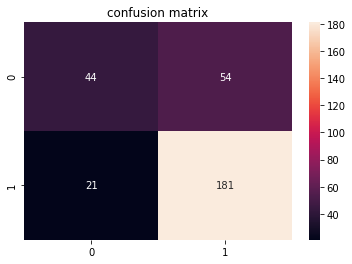

Model accuracy Training: 79.28571428571428
Model accuracy test: 75.0
model precision :  77.02127659574468
Model recall : 89.60396039603961
model F1 score :  0.8283752860411899
model AUC score :  0.6725095978985653

Cross val Accuracy Logistic Regression :  72.66666666666669
Cross val Pecision Logistic Regression :  78.8907942055985


In [36]:
#Make copy of data
unprocessed_data = data.copy()

# Separate independent and dependent variables
X = unprocessed_data.drop(columns=['creditScore'])
Y = unprocessed_data['creditScore']

#Encode all categorical variables
X = pd.get_dummies(X, drop_first=True)
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

#Split data into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Scale data before modelling
scaler = StandardScaler()
#scaler = MinMaxScaler()   #StandardScaler giving better performance
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate LogisticRegression model
logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, Y_train)

# Training predictions
yt_preds = logistic_regression.predict(X_train)

# Predict using test data
Y_preds = logistic_regression.predict(X_test)

#Evaluate model performance
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
val_scores = cross_val_score(logistic_regression, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy Logistic Regression : ", np.mean(val_scores)*100)
val_scores = cross_val_score(logistic_regression, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision Logistic Regression : ", np.mean(val_scores)*100)

**Observation:**
1.  With original data as is, without any processing, model is giving accuracy of 72% & precision of 78%
2. Since we have to predict creditScorer, we would like to avoid false positives i.e. people who could be bad creditScorer should NOT be predicted as good creditscorer for giving credits else it could adversely impact bank's business. Thus, we can focus on reducing False Positives i.e improving precision.
3. Model shows Overfitting problem with original unprocessed  as training accuracy is much higher than test accuracy. Let's run the model with processed data.

## 2) Logistic Regression : Balanced Cleaned data - all features

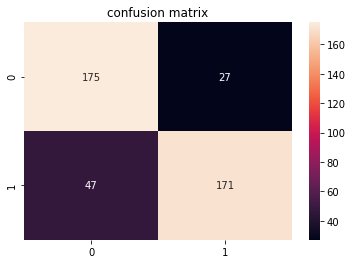

Model accuracy Training: 79.38775510204081
Model accuracy test: 82.38095238095238
model precision :  86.36363636363636
Model recall : 78.44036697247707
model F1 score :  0.8221153846153846
model AUC score :  0.8253701516940684

Cross val Accuracy Logistic Regression :  82.38095238095238
Cross val Pecision Logistic Regression :  85.10746754320806
Cross val Recall Logistic Regression :  80.27484143763213


In [37]:
from sklearn.preprocessing import binarize

# Take copy of balanced and cleaned data
balCleaned_data = data1.copy()

# Separate independent and dependent variables
X = balCleaned_data.drop(columns=['creditScore'])
Y = balCleaned_data['creditScore']

#Encode all categorical variables
X = pd.get_dummies(X, drop_first=True)
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

#Split data into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Scale data before modelling
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate LogisticRegression model
logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, Y_train)

# Training predictions
yt_preds = logistic_regression.predict(X_train)

# Predict using training and test data
Yt_preds = logistic_regression.predict(X_train)
Y_preds = logistic_regression.predict(X_test)

#Evaluate model performance
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
accuracy = cross_val_score(logistic_regression, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy Logistic Regression : ", np.mean(accuracy)*100)
precision = cross_val_score(logistic_regression, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision Logistic Regression : ", np.mean(precision)*100)
Recall = cross_val_score(logistic_regression, X_test, Y_test, cv=n_folds, scoring='recall')
print("Cross val Recall Logistic Regression : ", np.mean(Recall)*100)

#Update model performance in dataframe
bal_data_perf = set_model_performace('LR',np.round(np.mean(accuracy)*100,2),np.round(np.mean(precision)*100,2),
                                     np.round(np.mean(Recall)*100,2))

**Observation:**
1. Logistic regression model with all features show overfitting problem. Let's fine tune the model to avoid overfitting.

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


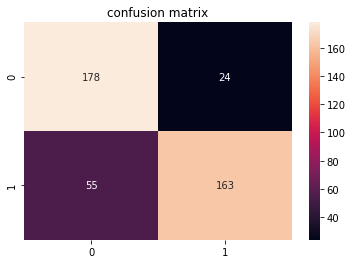

Model accuracy Training: 79.38775510204081
Model accuracy test: 81.19047619047619
model precision :  87.16577540106952
Model recall : 74.77064220183486
model F1 score :  0.8049382716049382
model AUC score :  0.814447270415115

Cross val Accuracy Logistic Regression :  80.95238095238095
Cross val Pecision Logistic Regression :  83.96093152319082
Cross val Recall Logistic Regression :  78.42494714587738


In [38]:
#Logistic Regression with hypertuned parameters
# Create hyparameters grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'penalty':['l1', 'l2', 'elasticnet', 'none'],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gs_lr = GridSearchCV(LogisticRegression(random_state=0), param_grid, cv=5)

# Fit model with gridsearch
gs_lr.fit(X_train, Y_train)
print(gs_lr.best_params_)

# Predict using training and test data
Yt_preds = gs_lr.predict(X_train)
Y_preds = gs_lr.predict(X_test)

#Evaluate model performance
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
# Accuracy score thru cross validation
n_folds=5
accuracy = cross_val_score(gs_lr, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy Logistic Regression : ", np.mean(accuracy)*100)
precision = cross_val_score(gs_lr, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision Logistic Regression : ", np.mean(precision)*100)
Recall = cross_val_score(gs_lr, X_test, Y_test, cv=n_folds, scoring='recall')
print("Cross val Recall Logistic Regression : ", np.mean(Recall)*100)

#Update model performance in dataframe
bal_data_perf = set_model_performace('LR',np.round(np.mean(accuracy)*100,2),np.round(np.mean(precision)*100,2),
                                     np.round(np.mean(Recall)*100,2))

**Observation:**
1. With balanced and cleaned data, Logistic Regression model precision has increased by 10% from 72% to 82%. Howver model showed overfitting.
2. After hyperparameters tuning overfitting problem is resolved. Final accuracy with cleaned data and all features is 80.95, which is 8% higher than accuracy from original data.

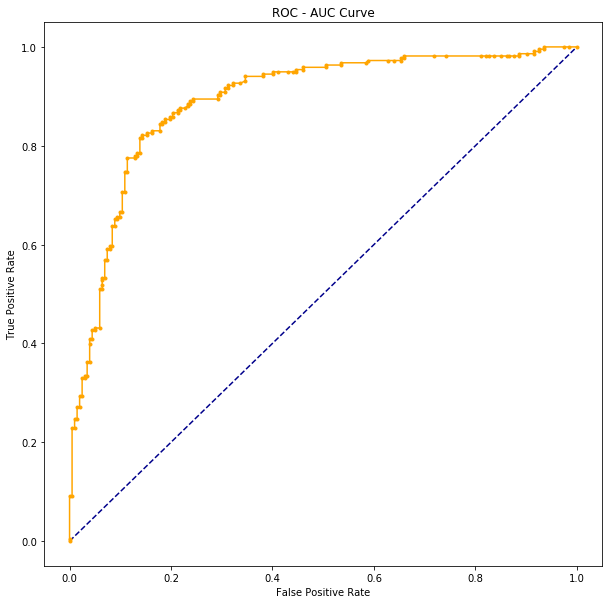

Random Prediction - Area under the curve (AUC) = 0.5
Logistic Regression - Area under the curve (AUC) = 0.8912707784539922


In [39]:
# ROC-AUC Curve
random_prediction = [1 for _ in range(len(Y_test))]
logistic_regression_prediction = logistic_regression.predict_proba(X_test)

random_predictions_fpr, random_predictions_tpr, _ = roc_curve(Y_test, random_prediction)
logistic_regression_fpr, logistic_regression_tpr, logistic_regression_thresholds = roc_curve(Y_test, logistic_regression_prediction[:, 1])

logistic_regression_thresholds

accuracy_list = []

for threshold in logistic_regression_thresholds:
    y_pred_thresh = np.where(logistic_regression_prediction[:, 1] > threshold, 1, 0)
    accuracy_list.append(accuracy_score(Y_test, y_pred_thresh))

accuracy_thresh_df = pd.concat([pd.Series(logistic_regression_thresholds), pd.Series(accuracy_list)], axis=1)
accuracy_thresh_df.columns=['Thresholds', 'Accuracy']
accuracy_thresh_df.sort_values(by='Accuracy', ascending=False, inplace=True)

plt.figure(figsize=(10, 10))
plt.plot(random_predictions_fpr, random_predictions_tpr, linestyle='--', label="Random Predictions", color='darkblue')
plt.plot(logistic_regression_fpr, logistic_regression_tpr, marker='.', label="Logistic Regression", color='orange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - AUC Curve")
plt.show()

random_auc = roc_auc_score(Y_test, random_prediction)
logistic_regression_auc = roc_auc_score(Y_test, logistic_regression_prediction[:, 1])

print(f"Random Prediction - Area under the curve (AUC) = {random_auc}")
print(f"Logistic Regression - Area under the curve (AUC) = {logistic_regression_auc}")


###  Optimization : Let's try to optimize the features


In [40]:
# Checking which of the input features affect target variable, using statsmodels.api.Logit model. 
# We will use cleaned balanced data as original data gave overfitting problem

# Separate independent and dependent variables
X = balCleaned_data.drop(columns=['creditScore'])
Y = balCleaned_data['creditScore']

#Encode all categorical variables
X = pd.get_dummies(X, drop_first=True)
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

# Build Logit model
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.447473
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.354      
Dependent Variable: y                AIC:              1306.9253  
Date:               2021-09-24 23:24 BIC:              1448.5194  
No. Observations:   1400             Log-Likelihood:   -626.46    
Df Model:           26               LL-Null:          -970.41    
Df Residuals:       1373             LLR p-value:      2.5128e-128
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
InRate             -0.0586   0.0687 -0.8531 0.3936 -0.1932  0.0760
NumCred             0.1577   0.1425  1.1062 0.2686 -0

In [41]:
# Measuring multicollinearity among independent features using VIF
vif_val = vif_scores(X)
print(vif_val)

   Independent Features  VIF Scores
0                InRate    9.275398
1               NumCred    8.438703
2               Ndepend   12.540320
3             Cbal_LT2K   14.656281
4            Cbal_NOACC    6.532685
5             Cdur_LT20    3.074189
6         Chist_Settled    5.957877
7         Cpur_Domestic    4.520215
8          Cpur_vehicle    4.035690
9            Camt_LT30K    4.426531
10            Sbal_LT1K    6.048786
11           Sbal_NOACC    1.835966
12             Edur_LT4    2.818591
13           Edur_NOEMP    1.148624
14             MSG_Male    3.620493
15         Oparties_Yes    1.150006
16             Rdur_LT3    2.446013
17      Prop_RealEstate    1.639896
18         Prop_Unknown    2.148078
19             age_LT40    4.458461
20         inPlans_none    9.521642
21       inPlans_stores    1.353348
22            Htype_own   14.706002
23      Htype_pays rent    3.257409
24      JobType_skilled    6.233164
25        telephone_yes    2.009195
26          foreign_yes    1

**Observation:** 

Following variables are not statistically significant based on p-value from Logit model or have multicollinearity problem. Let's drop those to build a model only with important features.

['Camt', 'NumCred', 'Cpur_Domestic', 'Cpur_vehicle','Sbal_NOACC', 'Edur_NOEMP', 'MSG_Male',
                            'Prop_Unknown', 'inPlans_stores', 'Htype_own', 'Htype_pays rent','JobType_skilled',
                           'InRate','Ndepend','age','Cbal_LT2K']

In [42]:
# Separate independent and dependent variables
X_reduced = X.drop(columns=['Camt_LT30K','InRate', 'NumCred', 'Cpur_vehicle','Edur_NOEMP', 'MSG_Male',
                            'inPlans_stores', 'Htype_own', 'Htype_pays rent','JobType_skilled','age_LT40','inPlans_none'])
y_reduced = y


In [43]:
X_reduced.columns

Index(['Ndepend', 'Cbal_LT2K', 'Cbal_NOACC', 'Cdur_LT20', 'Chist_Settled',
       'Cpur_Domestic', 'Sbal_LT1K', 'Sbal_NOACC', 'Edur_LT4', 'Oparties_Yes',
       'Rdur_LT3', 'Prop_RealEstate', 'Prop_Unknown', 'telephone_yes',
       'foreign_yes'],
      dtype='object')

In [44]:
# Run Logit model with only significant features
logit_model=sm.Logit(y_reduced,X_reduced)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.452704
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.347      
Dependent Variable: y                AIC:              1297.5724  
Date:               2021-09-24 23:24 BIC:              1376.2358  
No. Observations:   1400             Log-Likelihood:   -633.79    
Df Model:           14               LL-Null:          -970.41    
Df Residuals:       1385             LLR p-value:      1.3217e-134
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Ndepend             0.9593   0.1957  4.9017 0.0000  0.5757  1.3429
Cbal_LT2K          -1.0687   0.2515 -4.2487 0.0000 -1

## 3) Logistic Regression Model - With Important Features



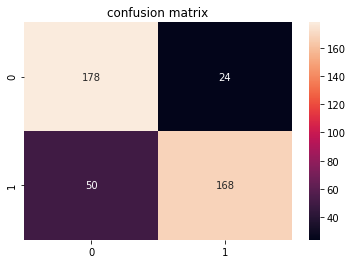

Model accuracy Training: 80.10204081632652
Model accuracy test: 82.38095238095238
model precision :  87.5
Model recall : 77.06422018348624
model F1 score :  0.8195121951219513
model AUC score :  0.8259151603233719

Cross val Accuracy Logistic Regression :  82.38095238095238
Cross val Pecision Logistic Regression :  85.70633479329132
Cross val Recall Logistic Regression :  79.80972515856236


In [45]:
#Split data into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, y_reduced, test_size=0.3, random_state=0)

#Scale data before modelling
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate LogisticRegression model
logistic_regression = LogisticRegression(random_state=0, C=10, solver='liblinear')
logistic_regression.fit(X_train, Y_train)

# Training predictions
yt_preds = logistic_regression.predict(X_train)

# Predict using test data
Y_preds = logistic_regression.predict(X_test)

#Evaluate model
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
accuracy = cross_val_score(logistic_regression, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy Logistic Regression : ", np.mean(accuracy)*100)
precision = cross_val_score(logistic_regression, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision Logistic Regression : ", np.mean(precision)*100)
Recall = cross_val_score(logistic_regression, X_test, Y_test, cv=n_folds, scoring='recall')
print("Cross val Recall Logistic Regression : ", np.mean(Recall)*100)

#Update model performance in dataframe
reduced_models = set_reduced_model_performace('LR',np.round(np.mean(accuracy)*100,2),np.round(np.mean(precision)*100,2),np.round(np.mean(Recall)*100,2))

**Observation:** 

Logistic regression model with reduced set of independent features has improved accuracy by almost 2%

# KNN Model

## 4) KNN Model : Original data



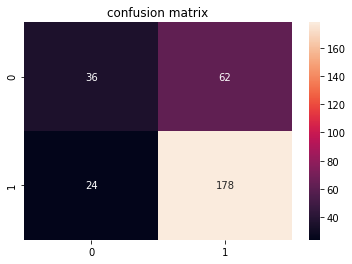

Model accuracy Training: 80.28571428571428
Model accuracy test: 71.33333333333334
model precision :  74.16666666666667
Model recall : 88.11881188118812
model F1 score :  0.8054298642533938
model AUC score :  0.6242675287936956

Cross val Accuracy KNN_model :  68.66666666666667
Cross val Pecision KNN_model :  72.10269630516406


In [46]:
# Separate independent and dependent variables
X = unprocessed_data.drop(columns=['creditScore'])
Y = unprocessed_data['creditScore']

#Encode all categorical variables
X = pd.get_dummies(X, drop_first=True)
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

#Split data into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Standardize data before modelling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate KNN Model
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, Y_train)

#Make predictions on training & test data
yt_preds = KNN_model.predict(X_train)
Y_preds = KNN_model.predict(X_test)

#Evaluate KNN model
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
val_scores = cross_val_score(KNN_model, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy KNN_model : ", np.mean(val_scores)*100)
val_scores = cross_val_score(KNN_model, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision KNN_model : ", np.mean(val_scores)*100)

[119, 101, 92, 88, 83, 86, 86, 89, 87]


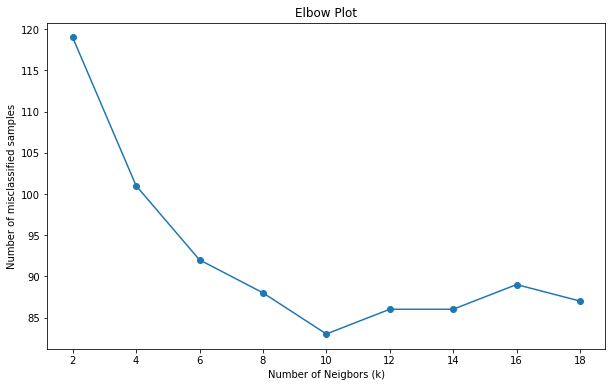

In [47]:
# Elbow method for determining value of K
misclassified_samples = []
for i in range(2, 20, 2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, Y_train)
    Y_preds = knn_model.predict(X_test)
    misclassified_samples.append((Y_test != Y_preds).sum())
    
print(misclassified_samples)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 20, 2), misclassified_samples, marker="o")
plt.xticks(range(2, 20, 2))
plt.title("Elbow Plot")
plt.xlabel("Number of Neigbors (k)")
plt.ylabel("Number of misclassified samples")
plt.show()

**Observation:** 

Elbow plot shows lowest error (misclassified samples) at K=10. Let's optimize KNN model with K=10.

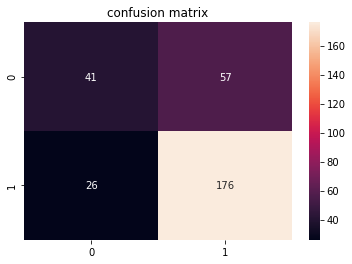

Model accuracy Training: 78.28571428571428
Model accuracy test: 72.33333333333334
model precision :  75.53648068669528
Model recall : 87.12871287128714
model F1 score :  0.8091954022988507
model AUC score :  0.6448272378258234

Cross val Accuracy KNN_model :  71.0
Cross val Pecision KNN_model :  72.66691274152082


In [48]:
# Instantiate KNN Model using Optimal K value from Elbow method
KNN_model = KNeighborsClassifier(n_neighbors=10)
KNN_model.fit(X_train, Y_train)

#Make predictions on training & test data
yt_preds = KNN_model.predict(X_train)
Y_preds = KNN_model.predict(X_test)

#Evaluate KNN model
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
val_scores = cross_val_score(KNN_model, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy KNN_model : ", np.mean(val_scores)*100)
val_scores = cross_val_score(KNN_model, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision KNN_model : ", np.mean(val_scores)*100)

**Observation:** 

Overfitting problem continues with KNN model built using original data even with optimized K value. Let's build KNN with cleaned data.

## 5) KNN Model : Balanced Cleaned data  & all features



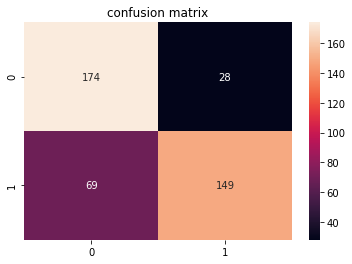

Model accuracy Training: 83.97959183673468
Model accuracy test: 76.90476190476191
model precision :  84.18079096045197
Model recall : 68.34862385321101
model F1 score :  0.7544303797468355
model AUC score :  0.7724361885729858

Cross val Accuracy KNN_model :  76.1904761904762
Cross val Pecision KNN_model :  80.04742625795258


In [49]:
# KNN using balanced and cleaned data

# Separate independent and dependent variables
X = balCleaned_data.drop(columns=['creditScore'])
Y = balCleaned_data['creditScore']

#Encode all categorical variables
X = pd.get_dummies(X, drop_first=True)
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X.columns

#Standardize data before modelling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate KNN Model
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, Y_train)

#Make predictions on training & test data
yt_preds = KNN_model.predict(X_train)
Y_preds = KNN_model.predict(X_test)

#Evaluate KNN model
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
val_scores = cross_val_score(KNN_model, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy KNN_model : ", np.mean(val_scores)*100)
val_scores = cross_val_score(KNN_model, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision KNN_model : ", np.mean(val_scores)*100)

**Elbow method for Optimizing value of K for KNN**

[127, 108, 107, 104, 101, 96, 98, 95, 95]


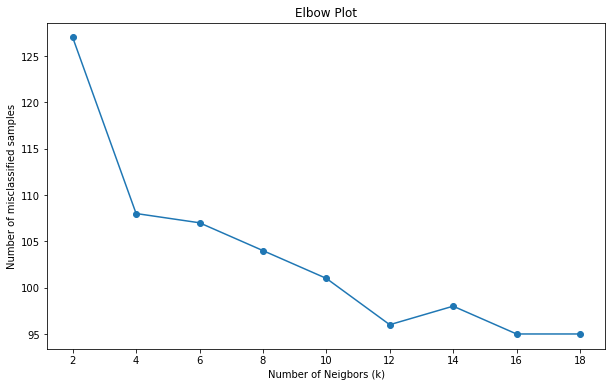

In [50]:
# Elbow method for determining value of K
misclassified_samples = []
for i in range(2, 20, 2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, Y_train)
    Y_preds = knn_model.predict(X_test)
    misclassified_samples.append((Y_test != Y_preds).sum())
    
print(misclassified_samples)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 20, 2), misclassified_samples, marker="o")
plt.xticks(range(2, 20, 2))
plt.title("Elbow Plot")
plt.xlabel("Number of Neigbors (k)")
plt.ylabel("Number of misclassified samples")
plt.show()

**Observation:** 

Elbow plot shows lowest error (misclassified samples) at K=12. Let's optimize KNN model with K=12.

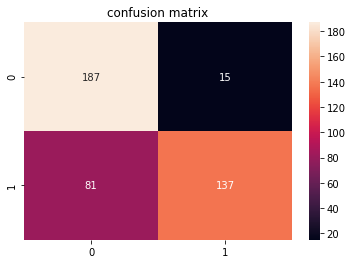

Model accuracy Training: 79.28571428571428
Model accuracy test: 77.14285714285715
model precision :  90.13157894736842
Model recall : 62.84403669724771
model F1 score :  0.7405405405405405
model AUC score :  0.7770914706149514

Cross val Accuracy KNN :  74.52380952380952
Cross val Pecision KNN :  87.38325808632685
Cross val Recall KNN :  59.61945031712473


In [51]:
# Build KNN model with K=12, selected based on Elbow method
KNN_k12_model = KNeighborsClassifier(n_neighbors=12)

KNN_k12_model.fit(X_train, Y_train)
yt_preds = KNN_k12_model.predict(X_train)
Y_preds = KNN_k12_model.predict(X_test)
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
accuracy = cross_val_score(KNN_k12_model, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy KNN : ", np.mean(accuracy)*100)
precision = cross_val_score(KNN_k12_model, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision KNN : ", np.mean(precision)*100)
Recall = cross_val_score(KNN_k12_model, X_test, Y_test, cv=n_folds, scoring='recall')
print("Cross val Recall KNN : ", np.mean(Recall)*100)

#Update model performance in dataframe
bal_data_perf = set_model_performace('KNN',np.round(np.mean(accuracy)*100,2),np.round(np.mean(precision)*100,2),np.round(np.mean(Recall)*100,2))

**Observation:** 

1. KNN model with balanced and cleaned data gives accuracy of 74.5% and precision of 87%
2. Overfitting problem is reduced with no much difference between training and test accuracy.

## 6) KNN Model : With Important features



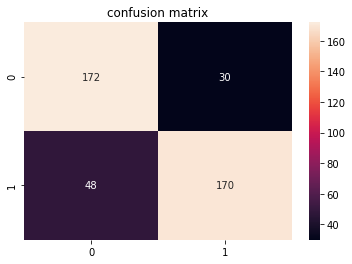

Model accuracy Training: 84.18367346938776
Model accuracy test: 81.42857142857143
model precision :  85.0
Model recall : 77.98165137614679
model F1 score :  0.8133971291866028
model AUC score :  0.8156508311381596


In [52]:
#Split data into training and test sets with reduced features
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, y_reduced, test_size=0.3, random_state=0)

#Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Reduced KNN Model
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, Y_train)

#Make predictions
yt_preds = KNN_model.predict(X_train)
Y_preds = KNN_model.predict(X_test)

#Evaluate Reduced KNN model
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)


[93, 83, 78, 72, 73, 77, 74, 71, 74, 76]


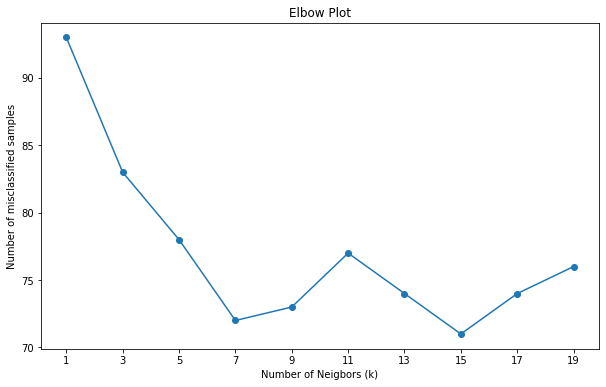

In [53]:
# Elbow method for determining value of K
misclassified_samples = []
for i in range(1, 20, 2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, Y_train)
    Y_preds = knn_model.predict(X_test)
    misclassified_samples.append((Y_test != Y_preds).sum())
    
print(misclassified_samples)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 20, 2), misclassified_samples, marker="o")
plt.xticks(range(1, 20, 2))
plt.title("Elbow Plot")
plt.xlabel("Number of Neigbors (k)")
plt.ylabel("Number of misclassified samples")
plt.show()

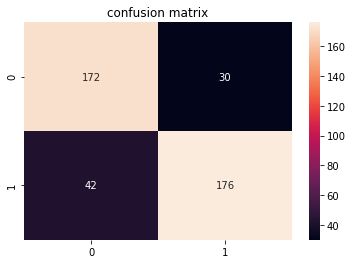

Model accuracy Training: 82.95918367346938
Model accuracy test: 82.85714285714286
model precision :  85.43689320388349
Model recall : 80.73394495412845
model F1 score :  0.830188679245283
model AUC score :  0.829412299028068

Cross val Accuracy KNN_model  :  82.14285714285714
Cross val Pecision KNN_model  :  87.11157739309515
Cross val Recall KNN_model :  77.5369978858351


In [54]:
# Rebuild KNN model wih K value(7) selected from above Elbow method
KNN_n7_model = KNeighborsClassifier(n_neighbors=7)
KNN_n7_model.fit(X_train, Y_train)
Y_preds = KNN_n7_model.predict(X_test)
Y_preds

#Make predictions
yt_preds = KNN_n7_model.predict(X_train)
Y_preds = KNN_n7_model.predict(X_test)

#Evaluate Reduced KNN model
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
# Accuracy score thru cross validation
n_folds=5
accuracy = cross_val_score(KNN_n7_model, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy KNN_model  : ", np.mean(accuracy)*100)
precision = cross_val_score(KNN_n7_model, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision KNN_model  : ", np.mean(precision)*100)
Recall = cross_val_score(KNN_n7_model, X_test, Y_test, cv=n_folds, scoring='recall')
print("Cross val Recall KNN_model : ", np.mean(Recall)*100)

#Update model performance in dataframe
reduced_models = set_reduced_model_performace('KNN',np.round(np.mean(accuracy)*100,2),np.round(np.mean(precision)*100,2),
                                              np.round(np.mean(Recall)*100,2))

**Observation:** 

1. Overfitting is avoided with reduced features. Accuracy of model is increased by 8%, from 74 to 82%.
2. KNN model performed better with optimized features

# Decision Tree Model

## 7) Decision Tree : Balanced Cleaned data,  all features



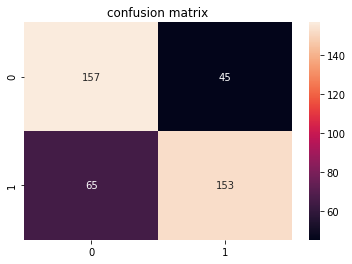

Model accuracy Training: 99.38775510204081
Model accuracy test: 73.80952380952381
model precision :  77.27272727272727
Model recall : 70.18348623853211
model F1 score :  0.735576923076923
model AUC score :  0.7395312925787992

Cross val Accuracy Decision Tree :  70.23809523809523
Cross val Pecision Decision Tree :  76.16902259903873


In [55]:
# Separate independent and dependent variables
X = balCleaned_data.drop(columns=['creditScore'])
Y = balCleaned_data['creditScore']

#Encode all categorical variables
X = pd.get_dummies(X, drop_first=True)
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X.columns

#Build Decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

#Make prediction on training and test data
yt_preds = dt.predict(X_train)
Y_preds = dt.predict(X_test)

#Evaluate model performance
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
val_scores = cross_val_score(dt, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy Decision Tree : ", np.mean(val_scores)*100)
val_scores = cross_val_score(dt, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision Decision Tree : ", np.mean(val_scores)*100)

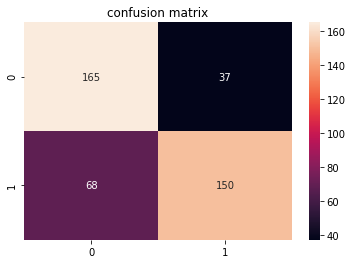

Model accuracy Training: 91.63265306122449
Model accuracy test: 75.0
model precision :  80.21390374331551
Model recall : 68.80733944954129
model F1 score :  0.7407407407407407
model AUC score :  0.7524525388318649

Cross val Accuracy Decision Tree :  74.04761904761907
Cross val Pecision Decision Tree :  74.04761904761907
Cross val Recall Decision Tree :  69.7463002114165


In [56]:
# Prune the decision tree with max_depth=10, min_splits=5
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
dt.fit(X_train, Y_train)

#Make prediction on training and test data
yt_preds = dt.predict(X_train)
Y_preds = dt.predict(X_test)

#Evaluate model performance
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
accuracy = cross_val_score(dt, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy Decision Tree : ", np.mean(accuracy)*100)
precision = cross_val_score(dt, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision Decision Tree : ", np.mean(accuracy)*100)
Recall = cross_val_score(dt, X_test, Y_test, cv=n_folds, scoring='recall')
print("Cross val Recall Decision Tree : ", np.mean(Recall)*100)

#Update model performance in dataframe
bal_data_perf = set_model_performace('DT',np.round(np.mean(accuracy)*100,2),np.round(np.mean(precision)*100,2),np.round(np.mean(Recall)*100,2))

## 8) Decision Tree : With Important Features



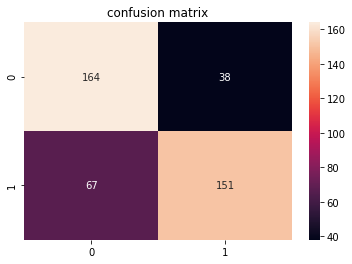

Model accuracy Training: 88.36734693877551
Model accuracy test: 75.0
model precision :  79.8941798941799
Model recall : 69.26605504587155
model F1 score :  0.7420147420147419
model AUC score :  0.7522708692887637

Cross val Accuracy Decision Tree  :  78.33333333333334
Cross val Pecision Decision Tree  :  83.26400237446748
Cross val Recall Decision Tree :  73.40380549682874


In [57]:
#Split data into training and test sets with reduced features
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, y_reduced, test_size=0.3, random_state=0)

#Build Reduced Decision tree model
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
dt.fit(X_train, Y_train)

#Make prediction on training and test data
yt_preds = dt.predict(X_train)
Y_preds = dt.predict(X_test)

#Evaluate model performance
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
accuracy = cross_val_score(dt, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy Decision Tree  : ", np.mean(accuracy)*100)
precision = cross_val_score(dt, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision Decision Tree  : ", np.mean(precision)*100)
Recall = cross_val_score(dt, X_test, Y_test, cv=n_folds, scoring='recall')
print("Cross val Recall Decision Tree : ", np.mean(Recall)*100)

#Update model performance in dataframe
reduced_models = set_reduced_model_performace('DT',np.round(np.mean(accuracy)*100,2),np.round(np.mean(precision)*100,2),np.round(np.mean(Recall)*100,2))

**Observation:** 

1. Decision tree model shows heavy Overfitting with both cleaned data with all independent features as well as with reduced set of independent features.

# Random Forest Model

## 9) Random Forest : Original data, all features



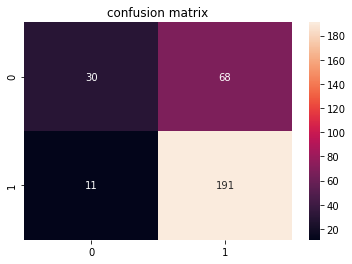

Model accuracy Training: 100.0
Model accuracy test: 73.66666666666667
model precision :  73.74517374517374
Model recall : 94.55445544554455
model F1 score :  0.8286334056399132
model AUC score :  0.6258335017175187

Cross val Accuracy Random Forest :  74.33333333333334
Cross val Pecision Random Forest :  75.73279779997104


In [58]:
# Random Forest with original data gives overfitting problem, hence we will not retain this model
# Separate independent and dependent variables
X = unprocessed_data.drop(columns=['creditScore'])
Y = unprocessed_data['creditScore']

#Encode all categorical variables
X = pd.get_dummies(X, drop_first=True)
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

#Split data into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Build RANDOM FOREST CLASSIFIER
rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(X_train, Y_train)

#Make prediction on training and test data
yt_preds = rf.predict(X_train)
Y_preds = rf.predict(X_test)

#Evaluate model performance
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
val_scores = cross_val_score(rf, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy Random Forest : ", np.mean(val_scores)*100)
val_scores = cross_val_score(rf, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision Random Forest : ", np.mean(val_scores)*100)

In [59]:
# Get feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('Camt', 0.12),
 ('age', 0.1),
 ('Cdur', 0.09),
 ('Cbal_no checking account', 0.06),
 ('InRate', 0.04),
 ('Sbal_Rs. < 1000', 0.03),
 ('NumCred', 0.02),
 ('Cbal_0 <= Rs. < 2000', 0.02),
 ('Chist_all settled till now', 0.02),
 ('Chist_dues not paid earlier', 0.02),
 ('Chist_none taken/all settled', 0.02),
 ('Cpur_electronics', 0.02),
 ('Cpur_furniture', 0.02),
 ('Cpur_second hand vehicle', 0.02),
 ('Sbal_no savings account', 0.02),
 ('Edur_4 to 7 years', 0.02),
 ('Edur_more than 7 years', 0.02),
 ('MSG_divorced or separated or married female', 0.02),
 ('MSG_single male', 0.02),
 ('Rdur_less than a year', 0.02),
 ('Rdur_more than 3 years', 0.02),
 ('Prop_real estate', 0.02),
 ('inPlans_none', 0.02),
 ('Htype_own', 0.02),
 ('JobType_employee with official position', 0.02),
 ('telephone_yes', 0.02),
 ('Ndepend', 0.01),
 ('Cbal_Rs. >=2000', 0.01),
 ('Cpur_education', 0.01),
 ('Cpur_new vehicle', 0.01),
 ('Sbal_5000 <= Rs. < 10,000', 0.01),
 ('Sbal_Rs. >= 10,000', 0.01),
 ('Edur_less than 1 

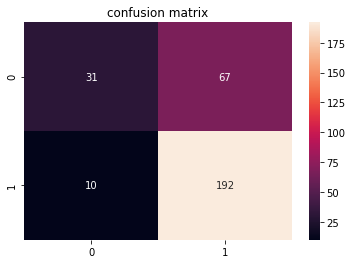

Model accuracy Training: 100.0
Model accuracy test: 74.33333333333333
model precision :  74.13127413127413
Model recall : 95.04950495049505
model F1 score :  0.8329718004338394
model AUC score :  0.6334107900585977

Cross val Accuracy Random Forest :  73.66666666666666
Cross val Pecision Random Forest :  75.10224188116592


In [60]:
# Try Random Forest with less important features removed
# Separate independent and dependent variables
X = unprocessed_data.drop(columns=['creditScore'])
Y = unprocessed_data['creditScore']

#Encode all categorical variables
X = pd.get_dummies(X, drop_first=True)
X = X.drop(columns = ['foreign_yes', 'JobType_non resident either unemployed or  unskilled ','inPlans_stores', 
                      'Cpur_retaining','Cpur_renovation','Cpur_miscellaneous','Cpur_domestic needs'])
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Build RANDOM FOREST CLASSIFIER
rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(X_train, Y_train)

#Make prediction on training and test data
yt_preds = rf.predict(X_train)
Y_preds = rf.predict(X_test)

#Evaluate model performance
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
val_scores = cross_val_score(rf, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy Random Forest : ", np.mean(val_scores)*100)
val_scores = cross_val_score(rf, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision Random Forest : ", np.mean(val_scores)*100)

**Observation:** 

1. Random Forest model with Original data as well gives very less performance even after removing less important feature and hyperparameters tuned. Let's not use this model further.

## 10) Random Forest : Balanced Cleaned data, all features



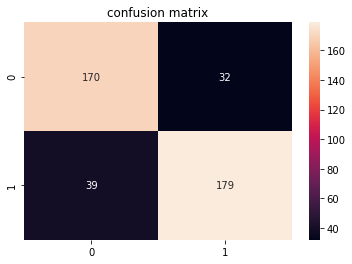

Model accuracy Training: 99.38775510204081
Model accuracy test: 83.0952380952381
model precision :  84.83412322274881
Model recall : 82.11009174311926
model F1 score :  0.8344988344988344
model AUC score :  0.8313425379235171

Cross val Accuracy Random Forest :  81.42857142857143
Cross val Pecision Random Forest :  81.9106572289499


In [61]:
# Separate independent and dependent variables
X = balCleaned_data.drop(columns=['creditScore'])
Y = balCleaned_data['creditScore']

#Encode all categorical variables
X = pd.get_dummies(X, drop_first=True)
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Build RANDOM FOREST CLASSIFIER
rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(X_train, Y_train)

#Make prediction on training and test data
yt_preds = rf.predict(X_train)
Y_preds = rf.predict(X_test)

#Evaluate model performance
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
val_scores = cross_val_score(rf, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy Random Forest : ", np.mean(val_scores)*100)
val_scores = cross_val_score(rf, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision Random Forest : ", np.mean(val_scores)*100)

In [62]:
# Get feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('Cbal_LT2K', 0.12),
 ('Cbal_NOACC', 0.1),
 ('Sbal_LT1K', 0.07),
 ('InRate', 0.06),
 ('Chist_Settled', 0.06),
 ('NumCred', 0.04),
 ('Edur_LT4', 0.04),
 ('Rdur_LT3', 0.04),
 ('Cdur_LT20', 0.03),
 ('Cpur_Domestic', 0.03),
 ('Cpur_vehicle', 0.03),
 ('Camt_LT30K', 0.03),
 ('Sbal_NOACC', 0.03),
 ('MSG_Male', 0.03),
 ('Oparties_Yes', 0.03),
 ('Prop_RealEstate', 0.03),
 ('inPlans_none', 0.03),
 ('JobType_skilled', 0.03),
 ('telephone_yes', 0.03),
 ('Ndepend', 0.02),
 ('Edur_NOEMP', 0.02),
 ('Prop_Unknown', 0.02),
 ('age_LT40', 0.02),
 ('Htype_own', 0.02),
 ('Htype_pays rent', 0.02),
 ('inPlans_stores', 0.01),
 ('foreign_yes', 0.01)]

### Random Forest : Less important featured eliminated


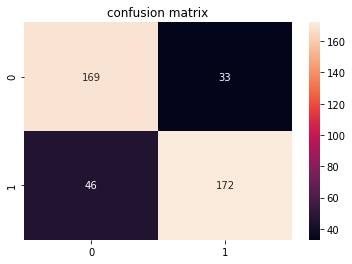

Model accuracy Training: 99.38775510204081
Model accuracy test: 81.19047619047619
model precision :  83.90243902439025
Model recall : 78.89908256880734
model F1 score :  0.8132387706855791
model AUC score :  0.812812244527205

Cross val Accuracy Random Forest :  81.19047619047619
Cross val Pecision Random Forest :  83.9057650087062


In [63]:
# Try Random Forest with less important features removed
# Separate independent and dependent variables
X = balCleaned_data.drop(columns=['creditScore'])
Y = balCleaned_data['creditScore']

#Encode all categorical variables
X = pd.get_dummies(X, drop_first=True)
X = X.drop(columns = ['foreign_yes', 'Htype_pays rent','inPlans_stores', 'Prop_Unknown'])
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Build RANDOM FOREST CLASSIFIER
rf = RandomForestClassifier(n_estimators=50, random_state=0)
rf.fit(X_train, Y_train)

#Make prediction on training and test data
yt_preds = rf.predict(X_train)
Y_preds = rf.predict(X_test)

#Evaluate model performance
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
val_scores = cross_val_score(rf, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy Random Forest : ", np.mean(val_scores)*100)
val_scores = cross_val_score(rf, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision Random Forest : ", np.mean(val_scores)*100)

**Observation:** 

1. Removing less important features did improve precision by a percent, but reduced model accuracy by a percent.
2. Also overfitting problem continues. Let's try to fine tune Random Forest hyperparameters to reduce overfitting problem.

### Random Forest : Hyperparameters Tuned

In [64]:
'''params = {
    'bootstrap': [True, False],
    'max_depth': [10, 30, 50],
    'max_features': [2,3,4,5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]}

# Instantiate the grid search model
gs_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params, 
                          cv = 3, n_jobs = -1, verbose = 2)
gs_rf.fit(X_train, Y_train)

#Make prediction on training and test data
yt_preds = gs_rf.predict(X_train)
Y_preds = gs_rf.predict(X_test)

#Evaluate model performance
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

print(gs_rf.best_params_)
print(gs_rf.best_score_)
'''

"params = {\n    'bootstrap': [True, False],\n    'max_depth': [10, 30, 50],\n    'max_features': [2,3,4,5],\n    'min_samples_leaf': [3, 4, 5],\n    'min_samples_split': [8, 10, 12],\n    'n_estimators': [100, 200]}\n\n# Instantiate the grid search model\ngs_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params, \n                          cv = 3, n_jobs = -1, verbose = 2)\ngs_rf.fit(X_train, Y_train)\n\n#Make prediction on training and test data\nyt_preds = gs_rf.predict(X_train)\nY_preds = gs_rf.predict(X_test)\n\n#Evaluate model performance\nevaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)\n\nprint(gs_rf.best_params_)\nprint(gs_rf.best_score_)\n"

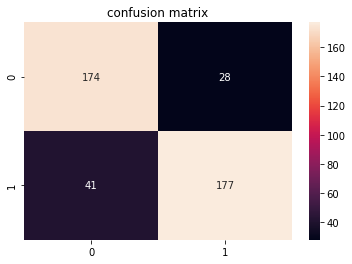

Model accuracy Training: 85.20408163265306
Model accuracy test: 83.57142857142857
model precision :  86.34146341463415
Model recall : 81.19266055045871
model F1 score :  0.8368794326241135
model AUC score :  0.8366563720592242

Cross val Accuracy Random Forest :  81.66666666666667
Cross val Pecision Random Forest :  83.65118342584759
Cross val Recall Random Forest :  81.17336152219872


In [65]:
#Random Forest with hyperparameters tuned
# Separate independent and dependent variables
X = balCleaned_data.drop(columns=['creditScore'])
Y = balCleaned_data['creditScore']

#Encode all categorical variables
X = pd.get_dummies(X, drop_first=True)
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Build RANDOM FOREST CLASSIFIER
rf = RandomForestClassifier(n_estimators=200,criterion='gini', max_features=3, min_samples_leaf=3, 
                            min_samples_split=12, random_state=0)
rf.fit(X_train, Y_train)

#Make prediction on training and test data
yt_preds = rf.predict(X_train)
Y_preds = rf.predict(X_test)

#Evaluate model performance
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
accuracy = cross_val_score(rf, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy Random Forest : ", np.mean(accuracy)*100)
precision = cross_val_score(rf, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision Random Forest : ", np.mean(precision)*100)
Recall = cross_val_score(rf, X_test, Y_test, cv=n_folds, scoring='recall')
print("Cross val Recall Random Forest : ", np.mean(Recall)*100)

#Update model performance in dataframe
bal_data_perf = set_model_performace('RF',np.round(np.mean(accuracy)*100,2),np.round(np.mean(precision)*100,2),
                                     np.round(np.mean(Recall)*100,2))


**Observation:** 

1. Hyperparameters did help minimizing the overfitting problem in Random Forest model. 
2. Random Forest gives test accuracy of 81% and precision 83%

## 11) Random Forest : With Important Features, Hyperparameters tuned



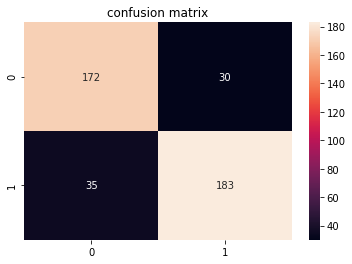

Model accuracy Training: 82.85714285714286
Model accuracy test: 84.52380952380952
model precision :  85.91549295774648
Model recall : 83.94495412844036
model F1 score :  0.8491879350348027
model AUC score :  0.8454673448996276

Cross val Accuracy RF  :  82.38095238095238
Cross val Pecision RF  :  85.99335175827132
Cross val Recall RF :  79.82029598308668


In [66]:
#Split data into training and test sets with reduced features
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, y_reduced, test_size=0.3, random_state=0)

#'bootstrap': True, 'max_depth': 80, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100

# Build RANDOM FOREST CLASSIFIER
rf = RandomForestClassifier(n_estimators=200,criterion='gini', max_features=3, min_samples_leaf=3, 
                            min_samples_split=12, random_state=0)
rf.fit(X_train, Y_train)

#Make prediction on training and test data
yt_preds = rf.predict(X_train)
Y_preds = rf.predict(X_test)

#Evaluate model performance
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
accuracy = cross_val_score(rf, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy RF  : ", np.mean(accuracy)*100)
precision = cross_val_score(rf, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision RF  : ", np.mean(precision)*100)
Recall = cross_val_score(rf, X_test, Y_test, cv=n_folds, scoring='recall')
print("Cross val Recall RF : ", np.mean(Recall)*100)

#Update model performance in dataframe
reduced_models = set_reduced_model_performace('RF',np.round(np.mean(accuracy)*100,2),np.round(np.mean(precision)*100,2),np.round(np.mean(Recall)*100,2))

**Observation:** 

1. Hyperparameters reduced overfitting of the random forest model. 
2. Using only important features improving model performance.

# SVM Model

## 12) SVM : Balanced cleaned data, all features



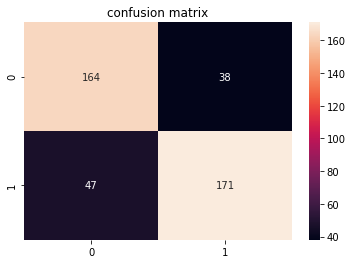

Model accuracy Training: 98.06122448979592
Model accuracy test: 79.76190476190477
model precision :  81.81818181818183
Model recall : 78.44036697247707
model F1 score :  0.8009367681498829
model AUC score :  0.7981424289217912

Cross val Accuracy SVM :  79.76190476190477
Cross val precision SVM :  80.96498323665585


In [67]:
# Separate independent and dependent variables
X = balCleaned_data.drop(columns=['creditScore'])
Y = balCleaned_data['creditScore']

#Encode all categorical variables
X = pd.get_dummies(X, drop_first=True)
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVC Classifier
svc_classifier = SVC(**{'kernel': 'rbf', 'C': 10}, random_state=0)
svc_classifier.fit(X_train, Y_train)

# Predict using training and test data
yt_preds = svc_classifier.predict(X_train)
Y_preds = svc_classifier.predict(X_test)
#Evaluate model
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
val_scores = cross_val_score(svc_classifier, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy SVM : ", np.mean(val_scores)*100)
val_scores = cross_val_score(svc_classifier, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val precision SVM : ", np.mean(val_scores)*100)

In [68]:
# Hyper parameter tuning
params = {"C": [1e-2, 1e-1, 1, 10], "kernel": ["rbf", "poly", "linear"],
         'gamma': [1, 0.1, 0.01, 0.001]}
gs_svm = GridSearchCV(SVC(random_state=0),
                           params, cv=5)

gs_svm.fit(X_train, Y_train)
gs_svm.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

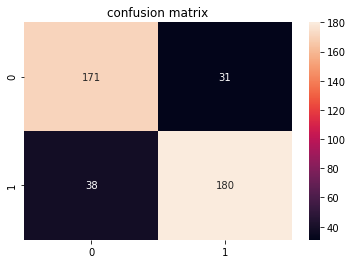

Model accuracy Training: 82.34693877551021
Model accuracy test: 83.57142857142857
model precision :  85.30805687203792
Model recall : 82.56880733944955
model F1 score :  0.8391608391608392
model AUC score :  0.8361113634299209

Cross val Accuracy SVM :  79.76190476190477
Cross val Pecision SVM :  83.16318432597501
Cross val Recall SVM :  77.06131078224101


In [69]:
# SVC Classifier
svc_classifier = SVC(**{'kernel': 'rbf', 'C': 1, 'gamma':0.01}, random_state=0)
svc_classifier.fit(X_train, Y_train)

# Predict using training and test data
yt_preds = svc_classifier.predict(X_train)
Y_preds = svc_classifier.predict(X_test)
#Evaluate model
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
accuracy = cross_val_score(svc_classifier, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy SVM : ", np.mean(accuracy)*100)
precision = cross_val_score(svc_classifier, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision SVM : ", np.mean(precision)*100)
Recall = cross_val_score(svc_classifier, X_test, Y_test, cv=n_folds, scoring='recall')
print("Cross val Recall SVM : ", np.mean(Recall)*100)

#Update model performance in dataframe
bal_data_perf = set_model_performace('SVM',np.round(np.mean(accuracy)*100,2),np.round(np.mean(precision)*100,2),np.round(np.mean(Recall)*100,2))

## 13) SVM : With Important Features



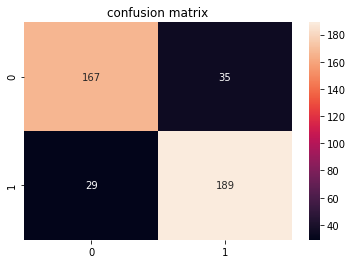

Model accuracy Training: 83.46938775510205
Model accuracy test: 84.76190476190476
model precision :  84.375
Model recall : 86.69724770642202
model F1 score :  0.8552036199095022
model AUC score :  0.8468525751657735


In [70]:
#Split data into training and test sets with reduced features
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, y_reduced, test_size=0.3, random_state=0)


#Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# SVC Classifier
svc_classifier = SVC(**{'kernel': 'rbf', 'C': 1}, random_state=0)
svc_classifier.fit(X_train, Y_train)

# Predict using training and test data
yt_preds = svc_classifier.predict(X_train)
Y_preds = svc_classifier.predict(X_test)
#Evaluate model
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

In [71]:
# Hyper parameter tuning
params = {"C": [1e-2, 1e-1, 1, 10], "kernel": ["rbf", "poly", "linear"],
         'gamma': [1, 0.1, 0.01, 0.001]}
gs_svm = GridSearchCV(SVC(random_state=0),
                           params, cv=5)

gs_svm.fit(X_train, Y_train)
gs_svm.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

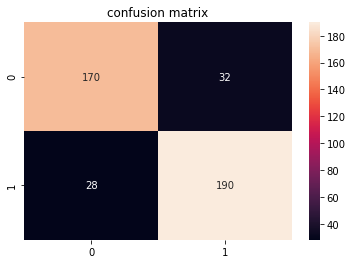

Model accuracy Training: 85.51020408163265
Model accuracy test: 85.71428571428571
model precision :  85.58558558558559
Model recall : 87.1559633027523
model F1 score :  0.8636363636363636
model AUC score :  0.8565718957216821

Cross val Accuracy svc_classifier  :  84.04761904761905
Cross val Pecision svc_classifier  :  84.49931828510833
Cross val Recall svc_classifier :  85.3276955602537


In [72]:
# SVC Classifier
svc_classifier = SVC(**{'kernel': 'rbf', 'C':1, 'gamma':0.1}, random_state=0)
svc_classifier.fit(X_train, Y_train)

# Predict using training and test data
yt_preds = svc_classifier.predict(X_train)
Y_preds = svc_classifier.predict(X_test)

#Evaluate model
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
accuracy = cross_val_score(svc_classifier, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy svc_classifier  : ", np.mean(accuracy)*100)
precision = cross_val_score(svc_classifier, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision svc_classifier  : ", np.mean(precision)*100)
Recall = cross_val_score(svc_classifier, X_test, Y_test, cv=n_folds, scoring='recall')
print("Cross val Recall svc_classifier : ", np.mean(Recall)*100)

#Update model performance in dataframe
reduced_models = set_reduced_model_performace('SVM',np.round(np.mean(accuracy)*100,2),np.round(np.mean(precision)*100,2),np.round(np.mean(Recall)*100,2))

**Observation:** 

1. After hyperparameters tuning, Overfitting problem is avoided for SVM model. SVM model with all parameters is giving better performance than reduced features SVM model.

## 14) Naive Bayes : Balanced Cleaned Data, All features



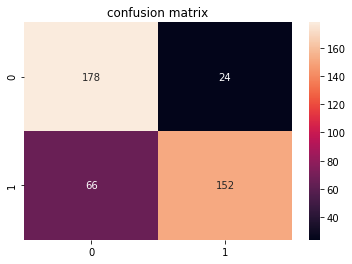

Model accuracy Training: 78.87755102040816
Model accuracy test: 78.57142857142857
model precision :  86.36363636363636
Model recall : 69.72477064220183
model F1 score :  0.7715736040609138
model AUC score :  0.7892179126169497

Cross val Accuracy Naive Bayes  :  79.52380952380953
Cross val Pecision Naive Bayes  :  85.13544772747808
Cross val Recall Naive Bayes :  74.28118393234672


In [73]:
# Separate independent and dependent variables
X = balCleaned_data.drop(columns=['creditScore'])
Y = balCleaned_data['creditScore']

#Encode all categorical variables
X = pd.get_dummies(X, drop_first=True)
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# SVC Classifier
cnb = CategoricalNB(alpha=0.1)
cnb.fit(X_train, Y_train)

# Predict using training and test data
yt_preds = cnb.predict(X_train)
Y_preds = cnb.predict(X_test)
#Evaluate model
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
accuracy = cross_val_score(cnb, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy Naive Bayes  : ", np.mean(accuracy)*100)
precision = cross_val_score(cnb, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision Naive Bayes  : ", np.mean(precision)*100)
Recall = cross_val_score(cnb, X_test, Y_test, cv=n_folds, scoring='recall')
print("Cross val Recall Naive Bayes : ", np.mean(Recall)*100)

#Update model performance in dataframe
bal_data_perf = set_model_performace('NB',np.round(np.mean(accuracy)*100,2),np.round(np.mean(precision)*100,2),
                                     np.round(np.mean(Recall)*100,2))

**Observation:** 

1. Naive bayes is giving lower accuracy than SVM model which performed best so far.

In [74]:
#Check Feature importances from Naive Bayes model
imps = permutation_importance(cnb, X_test, Y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
features=X_train.columns
# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. Cbal_LT2K (0.041905)
2. Cbal_NOACC (0.028095)
3. Sbal_LT1K (0.018095)
4. Prop_RealEstate (0.012857)
5. Sbal_NOACC (0.010952)
6. Edur_LT4 (0.007143)
7. Cdur_LT20 (0.007143)
8. JobType_skilled (0.007143)
9. Rdur_LT3 (0.005714)
10. Chist_Settled (0.003333)
11. foreign_yes (0.002857)
12. Camt_LT30K (0.002381)
13. inPlans_none (0.001905)
14. Htype_own (0.001429)
15. Ndepend (0.001429)
16. Oparties_Yes (0.001429)
17. age_LT40 (0.000952)
18. Cpur_vehicle (0.000952)
19. inPlans_stores (0.000476)
20. Prop_Unknown (-0.000476)
21. MSG_Male (-0.000476)
22. telephone_yes (-0.001429)
23. InRate (-0.002381)
24. Htype_pays rent (-0.002857)
25. Edur_NOEMP (-0.003810)
26. Cpur_Domestic (-0.005714)
27. NumCred (-0.007143)


## 15) Naive Bayes : With Important features



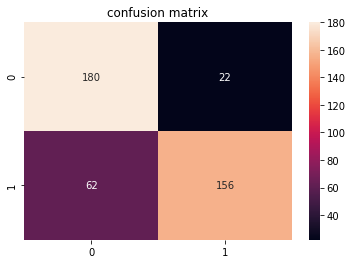

Model accuracy Training: 78.57142857142857
Model accuracy test: 80.0
model precision :  87.64044943820225
Model recall : 71.55963302752293
model F1 score :  0.7878787878787878
model AUC score :  0.8033427195930604

Cross val Accuracy Naive Bayes  :  80.95238095238095
Cross val Pecision Naive Bayes  :  87.64363097322018
Cross val Recall Naive Bayes :  74.29175475687103


In [75]:
#Split data into training and test sets with reduced features
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, y_reduced, test_size=0.3, random_state=0)


#Scale data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Naive Bayes Classifier
cnb = CategoricalNB (alpha=0.1)
cnb.fit(X_train, Y_train)

# Predict using training and test data
yt_preds = cnb.predict(X_train)
Y_preds = cnb.predict(X_test)
#Evaluate model
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
accuracy = cross_val_score(cnb, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy Naive Bayes  : ", np.mean(accuracy)*100)
precision = cross_val_score(cnb, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision Naive Bayes  : ", np.mean(precision)*100)
Recall = cross_val_score(cnb, X_test, Y_test, cv=n_folds, scoring='recall')
print("Cross val Recall Naive Bayes : ", np.mean(Recall)*100)

#Update model performance in dataframe
reduced_models = set_reduced_model_performace('NB',np.round(np.mean(accuracy)*100,2),np.round(np.mean(precision)*100,2),np.round(np.mean(Recall)*100,2))

**Observation:** 

1. With important features, accuracy of Naive Bayes model improved by a percent but still not performed better than SVM.

# Linear Discriminant Analysis Model

## 16) LDA : Balanced Cleaned data, all features



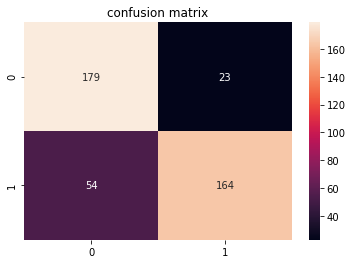

Model accuracy Training: 79.28571428571428
Model accuracy test: 81.66666666666667
model precision :  87.70053475935828
Model recall : 75.22935779816514
model F1 score :  0.8098765432098766
model AUC score :  0.8192160959215188

Cross val Accuracy Naive Bayes  :  80.0
Cross val Pecision Naive Bayes  :  85.64910571910617
Cross val Recall Naive Bayes :  74.32346723044397


In [76]:
# Separate independent and dependent variables
X = balCleaned_data.drop(columns=['creditScore'])
Y = balCleaned_data['creditScore']

#Encode all categorical variables
X = pd.get_dummies(X, drop_first=True)
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

#Split data into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Scale data before modelling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Instantiate model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

# Make predictions on training and test data
yt_preds = lda.predict(X_train)
Y_preds = lda.predict(X_test)

#Evaluate model
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
accuracy = cross_val_score(lda, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy Naive Bayes  : ", np.mean(accuracy)*100)
precision = cross_val_score(lda, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision Naive Bayes  : ", np.mean(precision)*100)
Recall = cross_val_score(lda, X_test, Y_test, cv=n_folds, scoring='recall')
print("Cross val Recall Naive Bayes : ", np.mean(Recall)*100)

#Update model performance in dataframe
bal_data_perf = set_model_performace('LDA',np.round(np.mean(accuracy)*100,2),np.round(np.mean(precision)*100,2),
                                     np.round(np.mean(Recall)*100,2))

## 17) LDA : With Important features



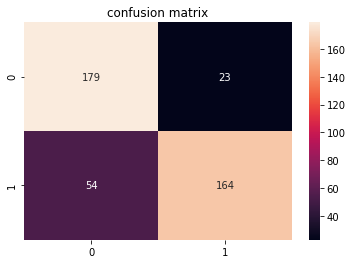

Model accuracy Training: 79.28571428571428
Model accuracy test: 81.66666666666667
model precision :  87.70053475935828
Model recall : 75.22935779816514
model F1 score :  0.8098765432098766
model AUC score :  0.8192160959215188

Cross val Accuracy Naive Bayes  :  80.0
Cross val Pecision Naive Bayes  :  85.64910571910617
Cross val Recall Naive Bayes :  74.32346723044397


In [77]:
#Split data into training and test sets with reduced features
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, y_reduced, test_size=0.3, random_state=0)

#Encode all categorical variables
X = pd.get_dummies(X, drop_first=True)
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

#Split data into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Scale data before modelling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Instantiate model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

# Make predictions on training and test data
yt_preds = lda.predict(X_train)
Y_preds = lda.predict(X_test)

#Evaluate model
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
accuracy = cross_val_score(lda, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy Naive Bayes  : ", np.mean(accuracy)*100)
precision = cross_val_score(lda, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Pecision Naive Bayes  : ", np.mean(precision)*100)
Recall = cross_val_score(lda, X_test, Y_test, cv=n_folds, scoring='recall')
print("Cross val Recall Naive Bayes : ", np.mean(Recall)*100)

#Update model performance in dataframe
reduced_models = set_reduced_model_performace('LDA',np.round(np.mean(accuracy)*100,2),np.round(np.mean(precision)*100,2),np.round(np.mean(Recall)*100,2))

In [78]:
lda.solver

'svd'

# PCA

##  17) Logistic Regression with PCA



In [79]:
# Separate independent and dependent variables
X = balCleaned_data.drop(columns=['creditScore'])
Y = balCleaned_data['creditScore']

#Encode all categorical variables
X = pd.get_dummies(X, drop_first=True)
encoder = LabelEncoder()
y = encoder.fit_transform(Y)

#Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
X_scaled.shape

(1400, 27)

In [81]:
pca = PCA(n_components=0.95) #We wnat 95% of explained variance for our data

#Transforming data input PCs columns
pcaed_data = pca.fit_transform(X_scaled)
pcaed_data

array([[-1.46627919,  0.33940063, -0.80749073, ..., -0.63914356,
         1.61384284, -1.42304287],
       [ 1.58906881,  1.79327921, -0.02477985, ...,  0.6519703 ,
        -0.67525338,  0.0856057 ],
       [ 0.87535619, -2.76760258,  0.3929686 , ..., -0.51109873,
         0.16332274,  0.23858263],
       ...,
       [-0.554027  , -2.00044811,  0.76233334, ..., -0.66385065,
        -0.40776723,  0.3523172 ],
       [-2.03057775, -0.85624701,  0.59165307, ...,  0.97577875,
        -0.14569212, -0.10229365],
       [-1.77995738, -0.46168302,  0.90021579, ..., -0.98282422,
        -0.32495162, -0.04234693]])

In [82]:
pcaed_data.shape   # Find no. of PCs created by PCA method

(1400, 22)

In [83]:
#Storing PCs in dataframe
df_pca = pd.DataFrame(pcaed_data, columns=['PC1','PC2','pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13', 'pc14','pc15','pc16','pc17','pc18','pc19','pc20','pc21','pc22'])
df_pca['creditScore'] = y
print("PCAed Dataset:\n", type(df_pca), df_pca.shape)

PCAed Dataset:
 <class 'pandas.core.frame.DataFrame'> (1400, 23)


In [84]:
#Now you can run classification model on PCAed data
#split data into training and test
X = df_pca.drop(columns='creditScore')
Y = df_pca['creditScore']
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)


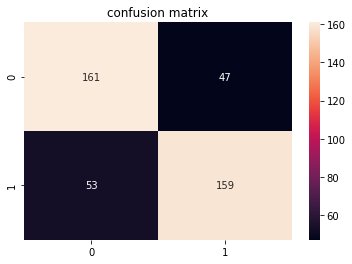

Model accuracy Training: 80.61224489795919
Model accuracy test: 76.19047619047619
model precision :  77.18446601941747
Model recall : 75.0
model F1 score :  0.7607655502392345
model AUC score :  0.7620192307692308

Cross val Accuracy logistic_regression :  76.90476190476191
Cross val Precision logistic_regression :  78.78796340736216


In [85]:
# LOGISTIC REGRESSION
logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, Y_train)

logistic_regression.coef_
logistic_regression.intercept_

#Make predictions on training and test data
yt_preds = logistic_regression.predict(X_train)
Y_preds = logistic_regression.predict(X_test)

#Evaluate model performance
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
val_scores = cross_val_score(logistic_regression, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy logistic_regression : ", np.mean(val_scores)*100)
val_scores = cross_val_score(logistic_regression, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Precision logistic_regression : ", np.mean(val_scores)*100)

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


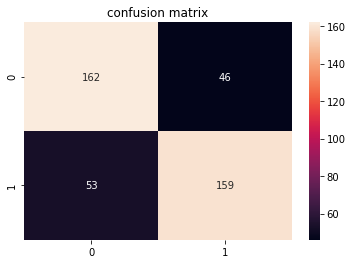

Model accuracy Training: 80.20408163265306
Model accuracy test: 76.42857142857142
model precision :  77.5609756097561
Model recall : 75.0
model F1 score :  0.762589928057554
model AUC score :  0.7644230769230769

Cross val Accuracy logistic_regression :  76.66666666666667
Cross val Precision logistic_regression :  78.93623439555854


In [86]:
#Logistic Regression with hypertuned parameters
# Create hyparameters grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'penalty':['l1', 'l2', 'elasticnet', 'none'],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gs_lr = GridSearchCV(LogisticRegression(random_state=0), param_grid, cv=5)

# Fit model with gridsearch
gs_lr.fit(X_train, Y_train)
print(gs_lr.best_params_)

#Make predictions on training and test data
yt_preds = gs_lr.predict(X_train)
Y_preds = gs_lr.predict(X_test)

#Evaluate model performance
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

# Accuracy score thru cross validation
n_folds=5
val_scores = cross_val_score(gs_lr, X_test, Y_test, cv=n_folds, scoring='accuracy')
print("\nCross val Accuracy logistic_regression : ", np.mean(val_scores)*100)
val_scores = cross_val_score(gs_lr, X_test, Y_test, cv=n_folds, scoring='precision')
print("Cross val Precision logistic_regression : ", np.mean(val_scores)*100)

##  18) LDA with PCA



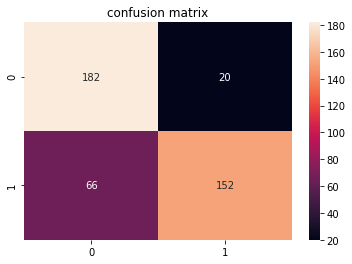

Model accuracy Training: 79.18367346938776
Model accuracy test: 79.52380952380952
model precision :  88.37209302325581
Model recall : 69.72477064220183
model F1 score :  0.7794871794871796
model AUC score :  0.7991189027159598


In [87]:
#split data into training and test
X = df_pca.drop(columns='creditScore')
y = df_pca['creditScore']

#Split data into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Instantiate model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

# Make predictions on training and test data
yt_preds = lda.predict(X_train)
Y_preds = lda.predict(X_test)

#Evaluate model
evaluate_classification_model(Y_test, Y_preds, Y_train, yt_preds)

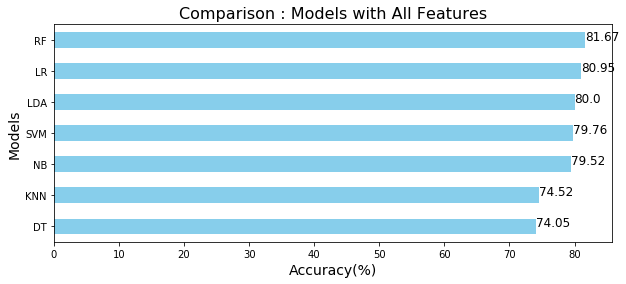

In [101]:
# Compare model performances - models ran with balanced clean data, all features
fig,ax = plt.subplots(figsize=(10,4))
acc_sorted = bal_data_perf['Accuracy'].sort_values()
acc_sorted.plot(kind='barh', color='skyblue')
for index, value in enumerate(zip(bal_data_perf.index,acc_sorted)):
    plt.text(value[1], index, str(value[1]), fontsize=12)
    plt.xlabel("Accuracy(%)", fontsize=14)
    plt.ylabel("Models", fontsize=14)
    plt.title("Comparison : Models with All Features", fontsize=16)
plt.show()

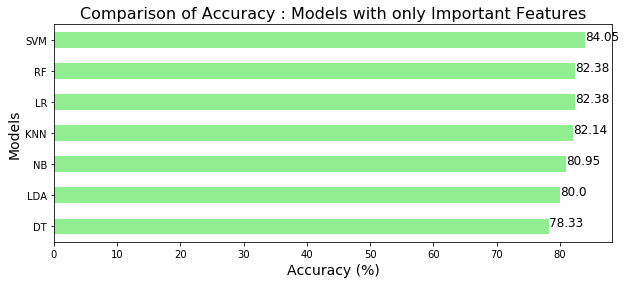

In [102]:
# Compare model performances Accuracy - Models ran with balanced clean data, Reduced features
fig,ax = plt.subplots(figsize=(10,4))
acc_sorted = reduced_models['Accuracy'].sort_values()
acc_sorted.plot(kind='barh', color='lightgreen')
for index, value in enumerate(zip(reduced_models.index,acc_sorted)):
    plt.text(value[1], index, str(value[1]), fontsize=12)
    plt.xlabel("Accuracy (%)", fontsize=14)
    plt.ylabel("Models", fontsize=14)
    plt.title("Comparison of Accuracy : Models with only Important Features", fontsize=16)
plt.show()

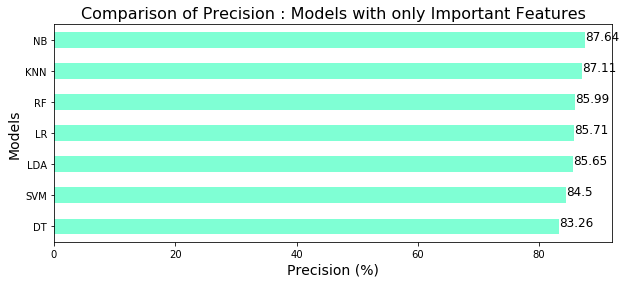

In [112]:
# Compare model performances Precision - Models ran with balanced clean data, Reduced features
fig,ax = plt.subplots(figsize=(10,4))
acc_sorted = reduced_models['Precision'].sort_values()
acc_sorted.plot(kind='barh', color='aquamarine')
for index, value in enumerate(zip(reduced_models.index,acc_sorted)):
    plt.text(value[1], index, str(value[1]), fontsize=12)
    plt.xlabel("Precision (%)", fontsize=14)
    plt.ylabel("Models", fontsize=14)
    plt.title("Comparison of Precision : Models with only Important Features", fontsize=16)
plt.show()

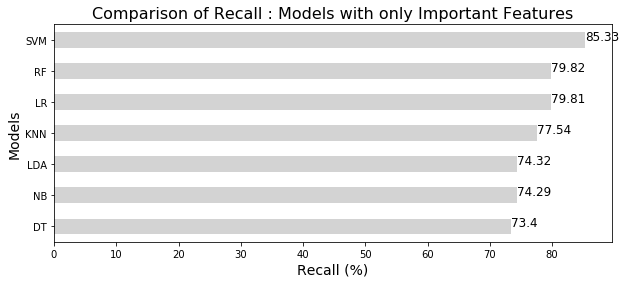

In [107]:
# Compare model performances Recall - Models ran with balanced clean data, Reduced features
fig,ax = plt.subplots(figsize=(10,4))
acc_sorted = reduced_models['Recall'].sort_values()
acc_sorted.plot(kind='barh', color='lightgray')
for index, value in enumerate(zip(reduced_models.index,acc_sorted)):
    plt.text(value[1], index, str(value[1]), fontsize=12)
    plt.xlabel("Recall (%)", fontsize=14)
    plt.ylabel("Models", fontsize=14)
    plt.title("Comparison of Recall : Models with only Important Features", fontsize=16)
plt.show()

In [90]:
models_df = bal_data_perf.copy()
models_df.rename(columns={'Accuracy':'Model with All Features'}, inplace=True)
models_df.drop(columns=['Precision','Recall'], inplace=True)
models_df = pd.concat([models_df, reduced_models], axis=1)
models_df.drop(columns=['Precision','Recall'], inplace=True)
models_df.rename(columns={'Accuracy':'Model with Only Important Features'}, inplace=True)
models_df.reset_index(inplace=True)

<Figure size 864x432 with 0 Axes>

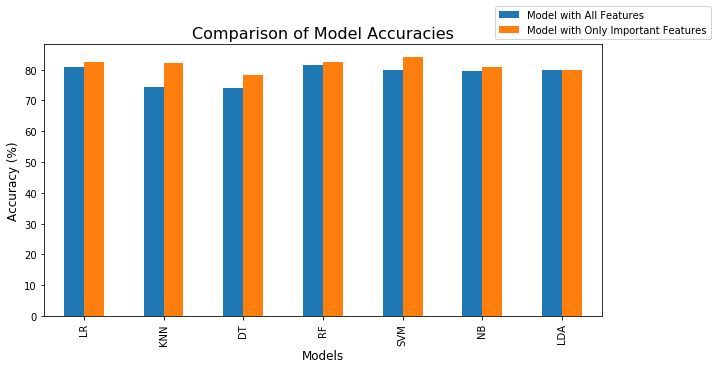

In [104]:
# Compare model performances - Models ran with balanced clean data, Reduced features
#models_df.reset_index(inplace=True)
plt.figure(figsize=(12,6))
models_df.plot(x="Models", y=["Model with All Features", "Model with Only Important Features"], kind="bar",figsize=(10,5))
plt.title("Comparison of Model Accuracies", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

# CONCLUSION

1. 'Cautious plc' company provided us data with an objective to predict credit worthiness of an individual.
2. We followed a data science project lifecycle to implement this project:

    a) Understanding problem and data
    b) Data Cleaning
    c) EDA
    d) Predictive modelling

    
3. In Data understanding, we identified that:

    a) Data is imbalanced 
    b) 15 of 21 features are of categorical nature
    c) 4 of the 6 numerical features are of discrete type
    d) Categories of categorical features needed cleaning to combine multiple categories
    e) Data possessed labels having two categories. Thus it was a binary classification problem from supervised machine learning.
    
4. As part of EDA:

    a) We visualized categorical and numerical features
    b) We cleaned up category values for categorical variables
    c) Binned numerical features
    d) Checked for outliers
    e) Balanced the data-used SMOTEC technique to balance the data by oversampling
    f) We encoded all categorical features
    
5. As part of predictive modelling, we tried 7 classification models from supervised machine learning:

    a) Logistic Regression
    b) KNN
    c) Decision Tree
    d) Random Forest
    e) SVM
    f) Naive Bayes
    g) Linear Discriminant Analysis
    
6. We implemented these models with 3 versions of data:

    a) Original data
    b) Balanced and cleaned data with all independent features
    c) Balanced and cleaned data with only important features
    
7. By comparing various models, we found that:

    a) Models executed with original data gave lowest accuracy (75-78%)
    b) Models executed with balanced cleaned data and all independent features improved accuracy by 8-10%, (80-82%)
    c) Modeks executed with balanced cleaned data and reduced set of features optimized model accuracy further

8. By comparing all the 18 models, we find that SVM with important set of features is giving best accuracy of 84%. 

9. Cross validation with 5 folds was used to get final accuracy score and compare across models.

10. Of the 20 given independent features, below 10 features turned out to be important features in predicting creditscore:
    
    1) Ndepend
    2) Cbal
    3) Cdur
    4) Chist
    5) Edur
    6) OParties
    7) Rdur
    8) Prop
    9) Telephone
    10) foreign
